### Detecting presence of USA300 SUR4 Plasmid in all MRSA Projects.

In [2]:
# Import Libraries and set path
import numpy as np
import pandas as pd
from IPython.display import HTML
import os
import readline
import argparse
from itertools import islice
import subprocess
import matplotlib.pyplot as plt

# Set this option for pandas to print data
pd.set_option("display.max_rows", None, "display.max_columns", None)

os.chdir("/nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection")

#### Processing 2019_Project_BAA_MRSA_CO_HA Plasmid variant calling results

In [16]:
# {Bash}
# !head -n1 /nfs/esnitkin/Project_MRSA/Analysis/2019_Project_BAA_MRSA_CO_HA/2021_08_25_USA300-SUR4_plasmid_variant_calling/MRSA_CO_HA_236_/MRSA_CO_HA_236__stats_results/*_depth_of_coverage.sample_summary > 2019_Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage.sample_summary.tsv

# !for i in `ls /nfs/esnitkin/Project_MRSA/Analysis/2019_Project_BAA_MRSA_CO_HA/2021_08_25_USA300-SUR4_plasmid_variant_calling/MRSA_CO_HA_*_/MRSA_CO_HA_*__stats_results/*_depth_of_coverage.sample_summary`; do grep '^MRSA' $i; done >> 2019_Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage.sample_summary.tsv

# 2022_07_14_Jail_CDC_combined_variant_calling doesn't contain all the samples
# !head -n1 /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2019_Project_BAA_MRSA_CO_HA/2022_07_14_Jail_CDC_combined_variant_calling/MRSA_CO_HA_236_/*_stats_results/*_depth_of_coverage.sample_summary > 2019_Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.sample_summary.tsv
# !for i in `ls /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2019_Project_BAA_MRSA_CO_HA/2022_07_14_Jail_CDC_combined_variant_calling/MRSA_CO_HA_*/*_stats_results/*_depth_of_coverage.sample_summary`; do grep '^MRSA' $i; done >> 2019_Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.sample_summary.tsv

#!head -n1 MRSA_CO_HA_326_/MRSA_CO_HA_326__stats_results/*_depth_of_coverage.sample_summary > /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection/2019_Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.sample_summary.tsv 
#!for i in `ls /scratch/esnitkin_root/esnitkin/apirani/Project_MRSA/Analysis/2019_Project_BAA_MRSA_CO_HA/2023_03_13_BAA_MRSA_CO_HA_variant_calling/MRSA_*/MRSA_*_stats_results/*depth_of_coverage.sample_summary`; do grep '^MRSA' $i; done >> /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection/2019_Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.sample_summary.tsv

#!sed -i 's/\t/,/g' 2019_Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage.sample_summary.tsv
#!sed -i 's/_L001_R1_001.fastq.gz/_R1_001.fastq.gz/g' 2019_Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage.sample_summary.tsv 

In [2]:
Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage = pd.read_csv("2019_Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage.sample_summary.tsv", sep=',', header=0, dtype = str)

Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage = pd.read_csv("2019_Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.sample_summary.tsv", sep=',', header=0, dtype = str)

# Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.rename(columns={"mean": "WG Mean Read Depth"})
# Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage.rename(columns={"mean": "Plasmid Mean Read Depth"})

Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage = Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.add_prefix('WG_')
Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage = Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage.add_prefix('Plasmid_')
Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage = Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.rename(columns={"WG_sample_id": "sample_id"})
Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage = Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage.rename(columns={"Plasmid_sample_id": "sample_id"})

Project_BAA_MRSA_CO_HA_depth_of_coverage = pd.merge(Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage, Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage, on=["sample_id", "sample_id"])
Project_BAA_MRSA_CO_HA_depth_of_coverage = Project_BAA_MRSA_CO_HA_depth_of_coverage.replace(['_R1_001.fastq.gz'], '', regex=True)

Project_BAA_MRSA_CO_HA_depth_of_coverage['WG_mean'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['WG_mean'].astype(float)
Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_mean'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_mean'].astype(float)
Project_BAA_MRSA_CO_HA_depth_of_coverage['WG_granular_median'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['WG_granular_median'].astype(float)
Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_granular_median'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_granular_median'].astype(float)
Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_1'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_1'].astype(float)
Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_5'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_5'].astype(float)
Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_20'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_20'].astype(float)
# Project_BAA_MRSA_CO_HA_depth_of_coverage.columns

Project_BAA_MRSA_CO_HA_depth_of_coverage['Normalized Plasmid_mean'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_mean'] / Project_BAA_MRSA_CO_HA_depth_of_coverage['WG_mean']
Project_BAA_MRSA_CO_HA_depth_of_coverage['Normalized Plasmid_granular_median'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_granular_median'] / Project_BAA_MRSA_CO_HA_depth_of_coverage['WG_granular_median']
Project_BAA_MRSA_CO_HA_depth_of_coverage.to_csv('Project_BAA_MRSA_CO_HA_depth_of_coverage_metadata.csv', index=False)

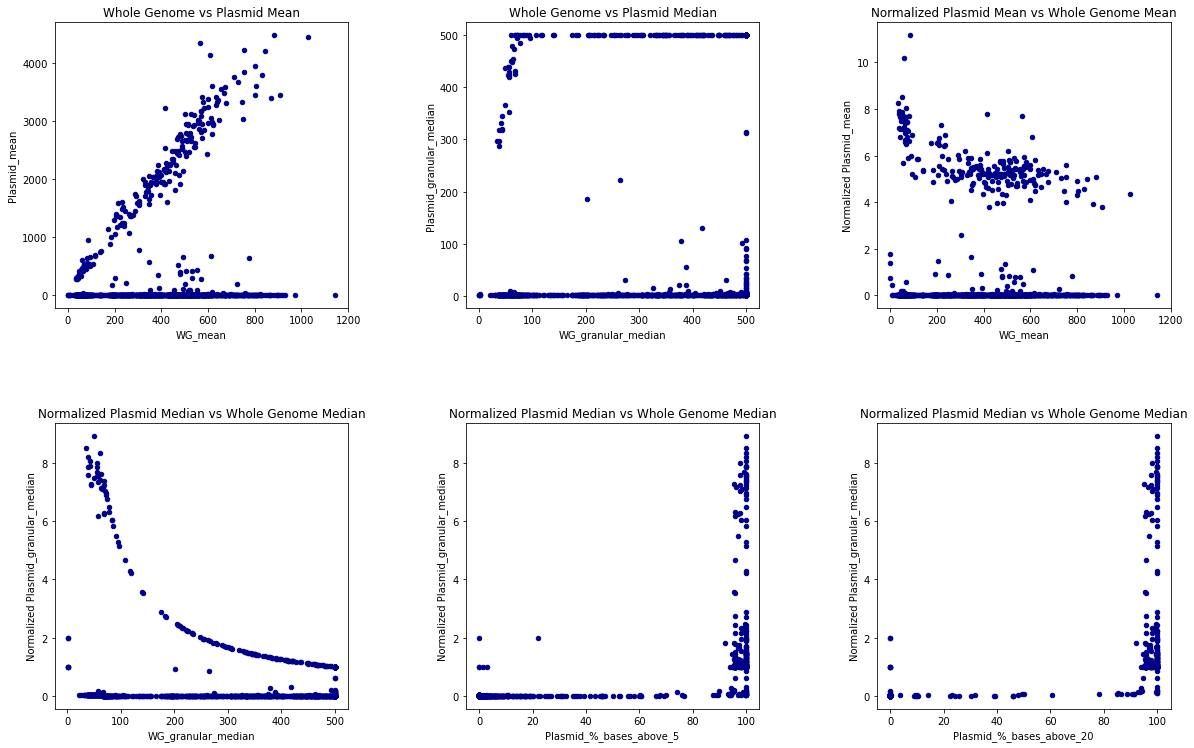

In [18]:
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(3, 3, 1)

ax1 = Project_BAA_MRSA_CO_HA_depth_of_coverage.plot.scatter(x = 'WG_mean', y = 'Plasmid_mean', c = 'DarkBlue', title="Whole Genome vs Plasmid Mean", ax=ax)

ax = fig.add_subplot(3, 3, 2)

ax1 = Project_BAA_MRSA_CO_HA_depth_of_coverage.plot.scatter(x = 'WG_granular_median', y = 'Plasmid_granular_median', c = 'DarkBlue', title="Whole Genome vs Plasmid Median", ax=ax)

ax = fig.add_subplot(3, 3, 3)

ax1 = Project_BAA_MRSA_CO_HA_depth_of_coverage.plot.scatter(x = 'WG_mean', y = 'Normalized Plasmid_mean', c = 'DarkBlue', title="Normalized Plasmid Mean vs Whole Genome Mean", ax=ax)
ax = fig.add_subplot(3, 3, 4)

ax1 = Project_BAA_MRSA_CO_HA_depth_of_coverage.plot.scatter(x = 'WG_granular_median', y = 'Normalized Plasmid_granular_median', c = 'DarkBlue', title="Normalized Plasmid Median vs Whole Genome Median", ax=ax)

ax = fig.add_subplot(3, 3, 5)

ax1 = Project_BAA_MRSA_CO_HA_depth_of_coverage.plot.scatter(x = 'Plasmid_%_bases_above_5', y = 'Normalized Plasmid_granular_median', c = 'DarkBlue', title="Normalized Plasmid Median vs Whole Genome Median", ax=ax)

ax = fig.add_subplot(3, 3, 6)

ax1 = Project_BAA_MRSA_CO_HA_depth_of_coverage.plot.scatter(x = 'Plasmid_%_bases_above_20', y = 'Normalized Plasmid_granular_median', c = 'DarkBlue', title="Normalized Plasmid Median vs Whole Genome Median", ax=ax)

In [5]:
# Deprecated - No longer using 100 bp window for visualization
plasmid_read_depth_100bp_window = pd.read_csv("/nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2019_Project_BAA_MRSA_CO_HA/2023_02_14_USA300-SUR4_plasmid_variant_calling/Mean_Depth_of_coverage_matrix.tsv", sep='\t', header=0)
plasmid_read_depth_100bp_window = plasmid_read_depth_100bp_window.replace('_depth_of_coverage_Mean_1000bp', '', regex=True)

plasmid_read_depth_100bp_window.drop(['Window'], axis=1)
plasmid_read_depth_100bp_window.head()
plasmid_read_depth_100bp_window = plasmid_read_depth_100bp_window.T
plasmid_read_depth_100bp_window_df = plasmid_read_depth_100bp_window.drop(['Window'], axis=0)

Project_BAA_MRSA_CO_HA_samples_below_threshold = Project_BAA_MRSA_CO_HA_depth_of_coverage[(Project_BAA_MRSA_CO_HA_depth_of_coverage['Normalized Plasmid_granular_median'] < 1) & (Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_5'] < 80)]['sample_id']

plasmid_read_depth_100bp_window_df['sample_id'] = plasmid_read_depth_100bp_window_df.index

#plasmid_read_depth_100bp_window_df[plasmid_read_depth_100bp_window_df['sample_id'].isin(Project_BAA_MRSA_CO_HA_samples_below_threshold.tolist())]
plasmid_read_depth_100bp_window_df_samples_below_threshold = plasmid_read_depth_100bp_window_df.loc[plasmid_read_depth_100bp_window_df['sample_id'].isin(Project_BAA_MRSA_CO_HA_samples_below_threshold.tolist())]

plasmid_read_depth_100bp_window_df_samples_below_threshold = plasmid_read_depth_100bp_window_df_samples_below_threshold.drop(['sample_id'], axis=1)

#import seaborn as sns
# plt.rcParams['figure.figsize'] = [100, 100]
#sns.clustermap(plasmid_read_depth_100bp_window_df_samples_below_threshold, xticklabels=True, yticklabels=True, cmap="YlGnBu", col_cluster=False, figsize=(20,20), vmax = 100, mask=(plasmid_read_depth_100bp_window_df_samples_below_threshold==0))

#sns.clustermap(plasmid_read_depth_100bp_window, xticklabels=True, yticklabels=True, cmap="YlGnBu", col_cluster=False, figsize=(20,20), vmax = 100, mask=(plasmid_read_depth_100bp_window==0))

In [ ]:
# generate mean and normalized mean read depth for each of the plasmid genes.
os.chdir("/nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2019_Project_BAA_MRSA_CO_HA/2023_02_14_USA300-SUR4_plasmid_variant_calling")
import glob
list_of_files = glob.glob('./MRSA_CO_HA_*/*_stats_results/*_depth_of_coverage')

paste_mean_file = "paste Gene.txt "
paste_median_file = "paste Gene.txt "
paste_norm_mean_file = "paste Gene.txt "
paste_norm_median_file = "paste Gene.txt "
count = 0
for file in list_of_files:
    #file = "MRSA_CO_HA_533_/MRSA_CO_HA_533__stats_results/MRSA_CO_HA_533__depth_of_coverage"
    #df = pd.read_csv("MRSA_CO_HA_533_/MRSA_CO_HA_533__stats_results/MRSA_CO_HA_533__depth_of_coverage", sep=',', header=0)
    
    # print("Analyzing - %s" % file)
    columnname = file.split('/')[1]
    sample_id = columnname.rstrip("_") + "_R1_001.fastq.gz"
    # print(columnname)
    df = pd.read_csv(file, sep=',', header=0)
    df = df.replace(['NZ_CP014374.1:'], '', regex=True)
    df = df.astype({'Locus':'int'})
    df = df.astype({'Total_Depth':'int'})
    # df.apply(pd.to_numeric)
    # df['Gene'] = np.where(df['Locus']<=477, 'replication/maintenance protein RepL', '')
    # df['Gene'] = np.where(((df['Locus']>=477) & (df['Locus']<=1172)), 'Non-coding', '')

    def label_race (row):
        if row['Locus'] <= 477:
            return 'replication/maintenance protein RepL'
        if row['Locus'] <= 1172:
            return 'Non-coding 1'
        if row['Locus'] <= 1231:
            return '23S rRNA methylase leader peptide ErmCL'
        elif row['Locus'] <= 1291:
            return 'Non-coding 2'
        elif row['Locus'] <= 2026:
            return '23S rRNA (adenine(2058)-N(6))-methyltransferase Erm(C)'
        elif row['Locus'] <= 2500:
            return 'Non-coding 3'
    if sample_id in str(Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage['sample_id']):
        count == count + 1
        df['Gene'] = df.apply(lambda row: label_race(row), axis=1)

        # gene_mean = df.groupby('Gene', sort=False, as_index=False)['Total_Depth'].transform().convert_dtypes()
        # gene_median = df.groupby('Gene', sort=False, as_index=False)['Total_Depth'].median().convert_dtypes()
        
        WG_mean = float(Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.loc[Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage['sample_id'] == sample_id, 'WG_mean'].iloc[0])
        WG_median = float(Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.loc[Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage['sample_id'] == sample_id, 'WG_granular_median'].iloc[0])
        
        # print(WG_mean)
        # print(WG_median)
        
        gene_mean = df.groupby('Gene', sort=False, as_index=False)['Total_Depth'].mean()
        gene_median = df.groupby('Gene', sort=False, as_index=False)['Total_Depth'].median()
        
        gene_normalized_mean = df.groupby('Gene', sort=False, as_index=False).apply(lambda x: x['Total_Depth'].mean()/WG_mean)
        gene_normalized_median = df.groupby('Gene', sort=False, as_index=False).apply(lambda x: x['Total_Depth'].median()/WG_median)
        
        # print(gene_normalized_median.columns)

        #gene_normalized_mean = gene_mean / float(MRSA_RO1_depth_of_coverage.loc[MRSA_RO1_depth_of_coverage['sample_id'] == sample_id, 'WG_mean'].iloc[0])
        #gene_normalized_median = gene_median / float(MRSA_RO1_depth_of_coverage.loc[MRSA_RO1_depth_of_coverage['sample_id'] == sample_id, 'WG_granular_median'].iloc[0])

        gene_median_file = file.replace('_depth_of_coverage', '_Gene_Median_Depth.csv')
        gene_mean_file = file.replace('_depth_of_coverage', '_Gene_Mean_Depth.csv')
        gene_norm_median_file = file.replace('_depth_of_coverage', '_Gene_Normalized_Median_Depth.csv')
        gene_norm_mean_file = file.replace('_depth_of_coverage', '_Gene_Normalized_Mean_Depth.csv')

        paste_mean_file = paste_mean_file + " %s" % gene_mean_file
        paste_median_file = paste_median_file + " %s" % gene_median_file
        paste_norm_mean_file = paste_norm_mean_file + " %s" % gene_norm_mean_file
        paste_norm_median_file = paste_norm_median_file + " %s" % gene_norm_median_file

        gene_mean.rename(columns = {'Total_Depth': columnname}, inplace = True)
        gene_median.rename(columns = {'Total_Depth': columnname}, inplace = True)
        # gene_normalized_mean.rename(columns = {"": columnname})
        # gene_normalized_median.rename(columns = {"": columnname})
        gene_normalized_mean.columns.values[1] = columnname
        gene_normalized_median.columns.values[1] = columnname
        # print(gene_mean)
        # print(gene_normalized_mean)
        
        gene_median[columnname].to_csv(gene_median_file, index=False)
        gene_mean[columnname].to_csv(gene_mean_file, index=False)
        gene_normalized_median[columnname].to_csv(gene_norm_median_file, index=False)
        gene_normalized_mean[columnname].to_csv(gene_norm_mean_file, index=False)

paste_mean_file = paste_mean_file + " > Mean_Gene_Depth.csv"
paste_median_file = paste_median_file + " > Median_Gene_Depth.csv"
paste_norm_mean_file = paste_norm_mean_file + " > Mean_Normalized_Gene_Depth.csv"
paste_norm_median_file = paste_norm_median_file + " > Median_Normalized_Gene_Depth.csv"

f = open("Gene.txt", "w+")
f.write("\nRepL\nNon-coding 1\nErmCL\nNon-coding 2\nErm(C)\nNon-coding 3")
f.close()

f = open("paste_mean.sh", "w+")
f.write(paste_mean_file)
f.close()

f = open("paste_median.sh", "w+")
f.write(paste_median_file)
f.close()

f = open("paste_norm_mean.sh", "w+")
f.write(paste_norm_mean_file)
f.close()

f = open("paste_norm_median.sh", "w+")
f.write(paste_norm_median_file)
f.close()

os.system("bash paste_mean.sh")
os.system("bash paste_median.sh")
os.system("bash paste_norm_mean.sh")
os.system("bash paste_norm_median.sh")

print ("Analyzed %s files" % count)
print ("Generated - Mean_Gene_Depth.csv, Median_Gene_Depth.csv, Mean_Normalized_Gene_Depth.csv and Median_Normalized_Gene_Depth.csv")

In [23]:
# Clean Mean_Normalized_Gene_Depth and generate Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth that will be used for heatmap.
os.chdir("/nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2019_Project_BAA_MRSA_CO_HA/2023_02_14_USA300-SUR4_plasmid_variant_calling")
plasmid_gene_read_depth = pd.read_csv("Mean_Normalized_Gene_Depth.csv", sep='\t', header=0)
plasmid_gene_read_depth = plasmid_gene_read_depth.replace('_depth_of_coverage_Mean_1000bp', '', regex=True)
plasmid_gene_read_depth = plasmid_gene_read_depth.T
new_header = plasmid_gene_read_depth.iloc[0] #grab the first row for the header
plasmid_gene_read_depth = plasmid_gene_read_depth[1:] #take the data less the header row
plasmid_gene_read_depth.columns = new_header #set the header row as the df header
plasmid_gene_read_depth[["RepL", "Non-coding 1", "ErmCL", "Non-coding 2", "Erm(C)", "Non-coding 3"]] = plasmid_gene_read_depth[["RepL", "Non-coding 1", "ErmCL", "Non-coding 2", "Erm(C)", "Non-coding 3"]].apply(pd.to_numeric)
plasmid_gene_read_depth['sample_id'] = plasmid_gene_read_depth.index
cols = plasmid_gene_read_depth.columns.tolist()
cols = cols[-1:] + cols[:-1]
plasmid_gene_read_depth = plasmid_gene_read_depth[cols]
plasmid_gene_read_depth.to_csv('Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth.csv', index=False)

In [ ]:
setwd("/nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection")

# {r}
# Load the packages
cran_packages <- c("BiocManager","phytools","ggplot2","tidyverse","readxl","randomcoloR","cowplot","printr")
# BiocManager packages
BiocManager_packages <- c("ggtree","ggnewscale")
lapply(cran_packages,library,character.only=T)
lapply(BiocManager_packages,library,character.only=T)
library(treeio)
library(pheatmap)


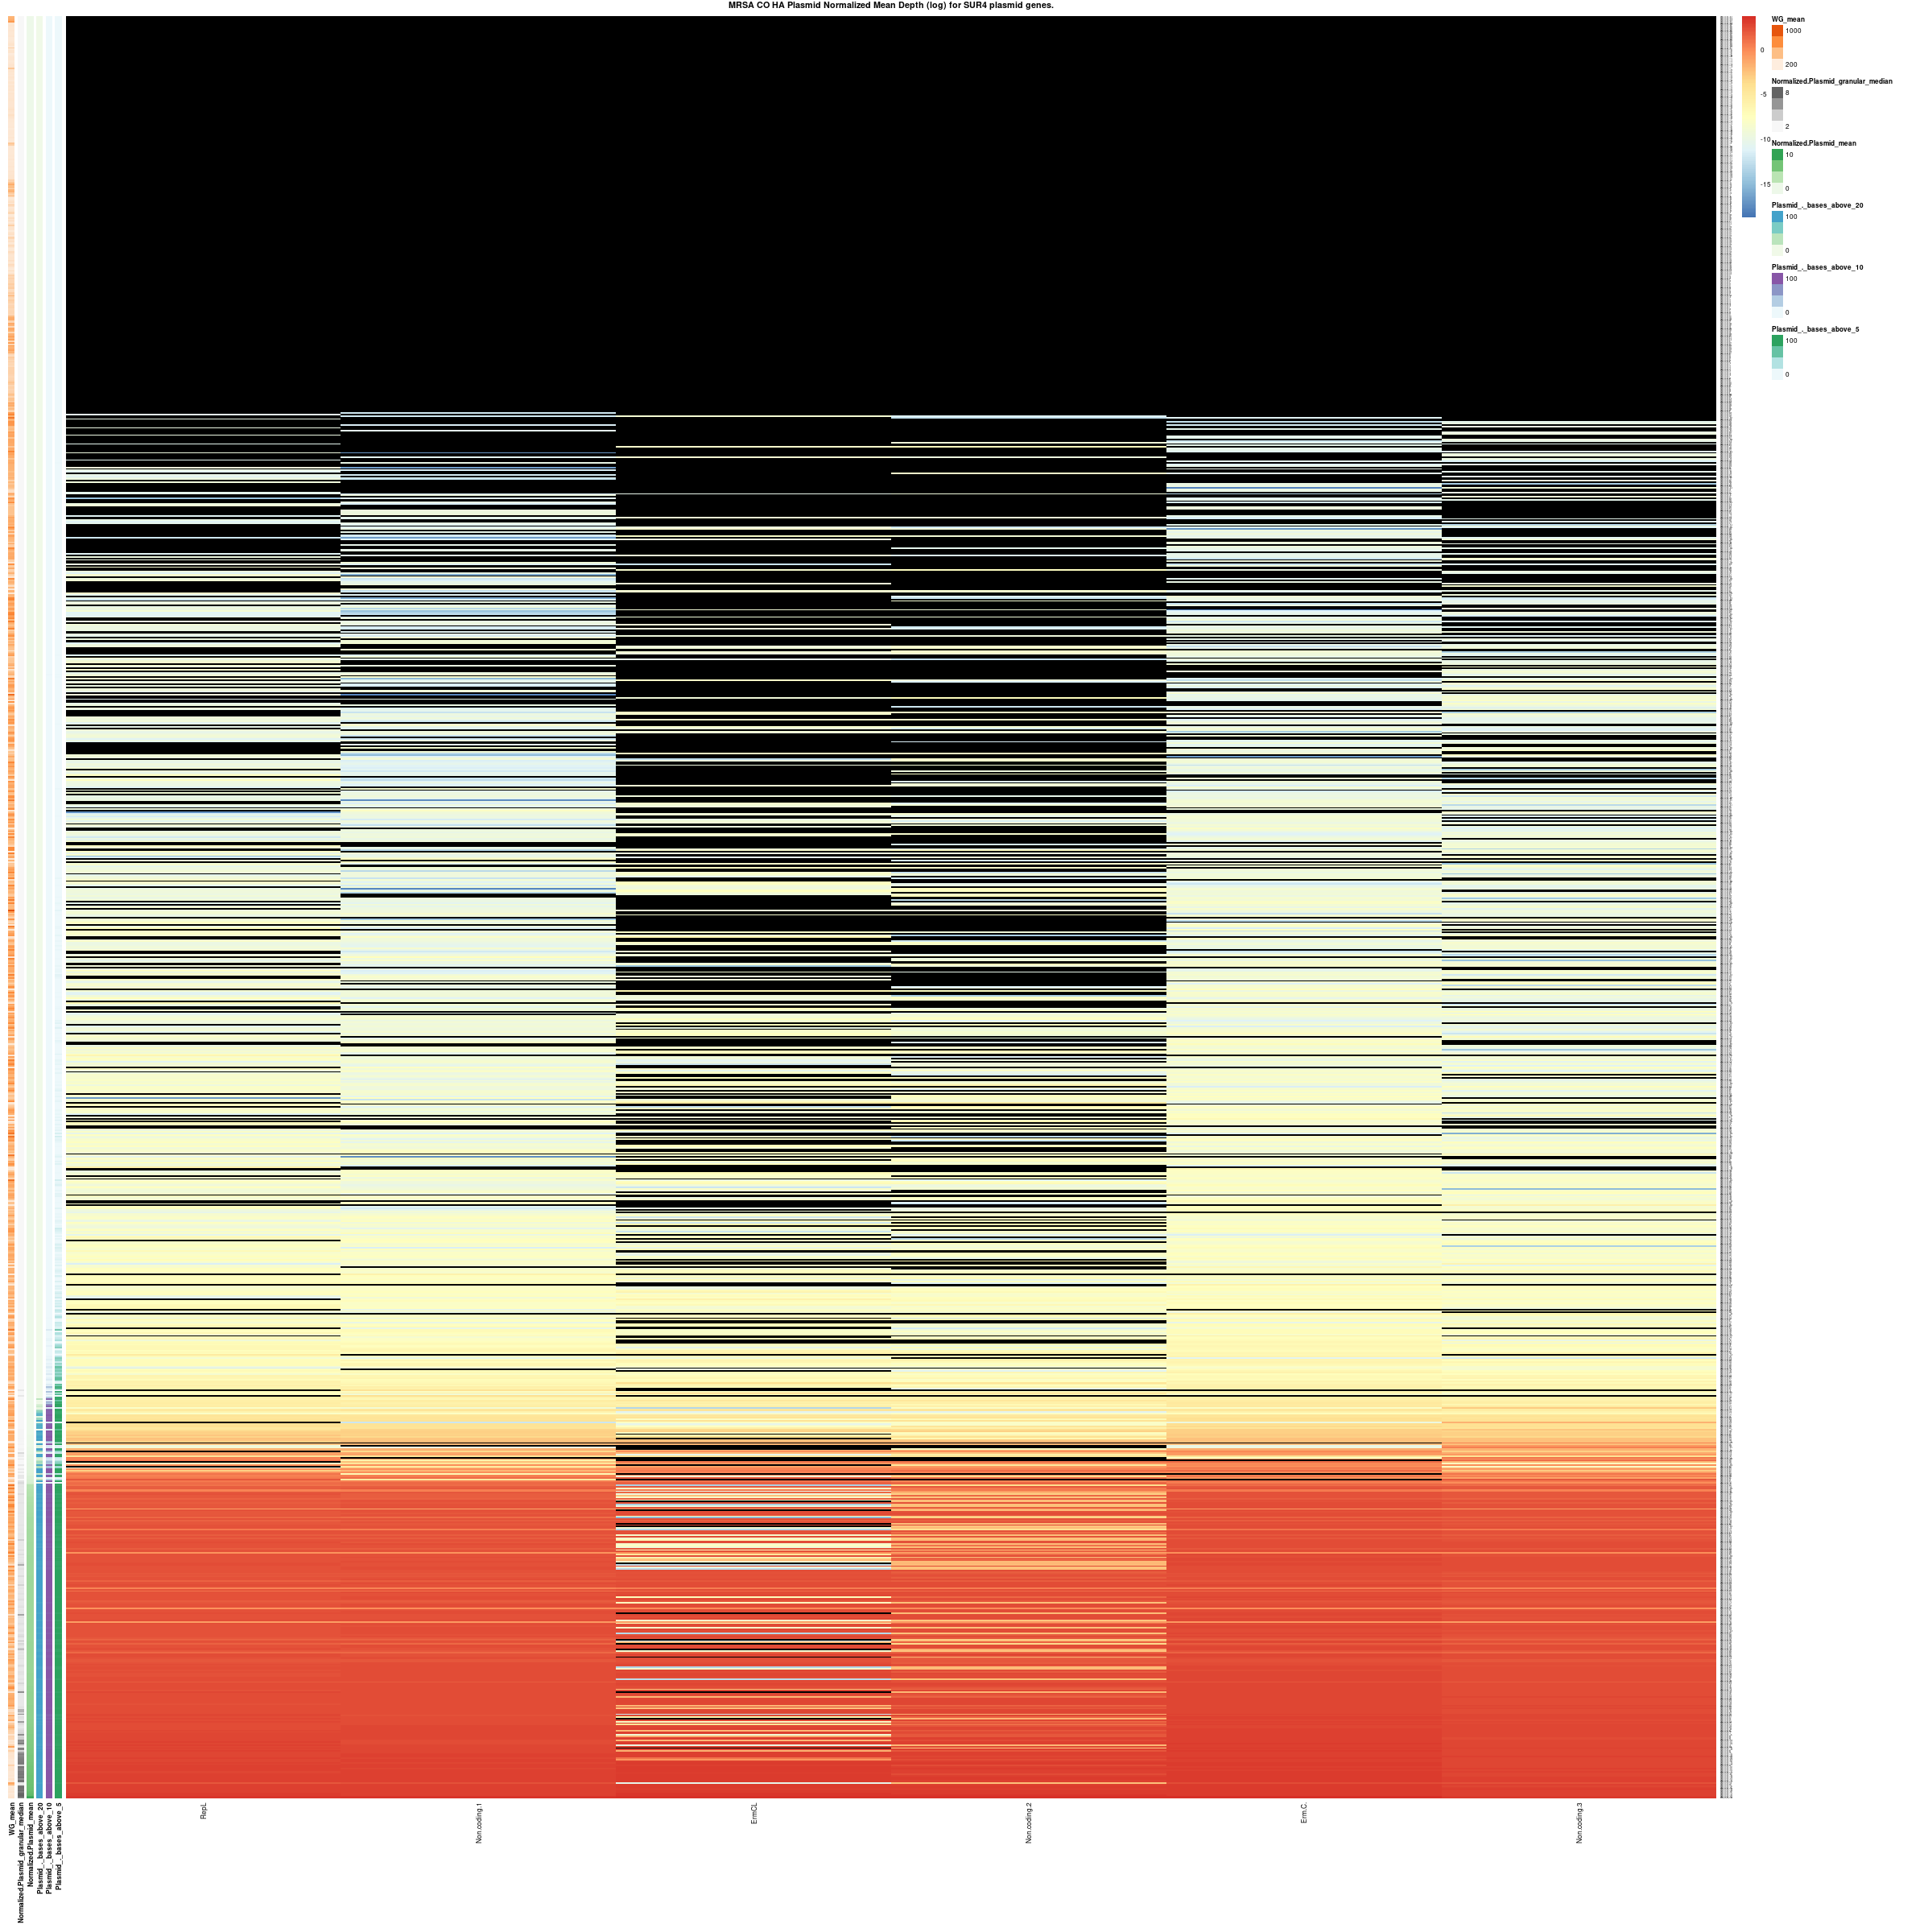

In [2]:
options(repr.plot.width = 20, repr.plot.height = 20)
# Read in the DepthofCoverage Metadata
MRSA_COHA_DepthofCoverage_metadata <- read.csv('Project_BAA_MRSA_CO_HA_depth_of_coverage_metadata.csv', row.names = 1)

MRSA_COHA_Norm_Mean_Gene_DepthofCoverage <- read.csv('Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth.csv', row.names = 1)

rownames(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage) <- gsub('_$', '', rownames(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage))

#Assign rownames to the Gene Read Depth dataframes

MRSA_COHA_Norm_Mean_Gene_DepthofCoverage$Samples <- rownames(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage)

# Drop NEG CONTRL Samples from the dataframe

MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL <- MRSA_COHA_Norm_Mean_Gene_DepthofCoverage

# Drop Outlier Sample MRSA_CM_1385 from the dataframe

#MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier <- MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL[-which(grepl("MRSA_CM_1385", MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL$Samples)),]
MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier <- MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL

# Drop usused column Samples

MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column <- subset(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier, select = -c(Samples) )

#colnames(MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier) <- c("RepL", "Non-coding 1", "ErmCL", "Non-coding 2", "Erm(C)", "Non-coding 3")

#annotation_row <- MRSA_RO1_DepthofCoverage_metadata[ , c("Plasmid_._bases_above_20", "Normalized.Plasmid_mean", "Normalized.Plasmid_granular_median", "WG_mean")]

# Extract Annotation rows from Depth of Coverage Metadata
annotation_row <- MRSA_COHA_DepthofCoverage_metadata[ , c("Plasmid_._bases_above_5", "Plasmid_._bases_above_10", "Plasmid_._bases_above_20", "Normalized.Plasmid_mean", "Normalized.Plasmid_granular_median", "WG_mean")]

# Assign rownames
annotation_row$Samples <- rownames(annotation_row)

# Drop NEG CTRL samples
annotation_row_exclude_NEG_CTRL <- annotation_row

# Drop outlier sample MRSA_CM_1385
annotation_row_exclude_NEG_CTRL_drop_outlier <- annotation_row_exclude_NEG_CTRL

# Sort row Annotations by Normalized.Plasmid_mean
annotation_row_exclude_NEG_CTRL_drop_outlier_sorted <- annotation_row_exclude_NEG_CTRL_drop_outlier[order(annotation_row_exclude_NEG_CTRL_drop_outlier$Normalized.Plasmid_mean),]

# Drop the unused Samples column
annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column_sorted <- subset(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted, select = -c(Samples) )

#colnames(annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column) <- c("%Basesabove20", "Norm.PlasmidMean", "Norm.PlasmidMedian", "WG_mean")

# Rename column names
colnames(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted) <- c("%Basesabove5", "%Basesabove10", "%Basesabove20", "Norm.PlasmidMean", "Norm.PlasmidMedian", "WG_mean")

#pheatmap(MRSA_RO1_Gene_DepthofCoverage, annotation_row = annotation_row, cluster_cols =  FALSE, angle_col = 45, fontsize_row=1, border_color=NA, fontsize = 5)

#MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[order(row.names(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted)), ]

#MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[order(row.names(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted)), ]

MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[match(rownames(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted), rownames(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column)), ]

MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- na.omit(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered)

MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log <- log2(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered)

is.na(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log) <- sapply(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log, is.infinite)

# pdf(file = "MRSA_COHA_Normalized_mean_Gene_DepthofCoverage.pdf",   # The directory you want to save the file in
#     width = 12, # The width of the plot in inches
#     height = 12) 
    
# pheatmap(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered, main="MRSA CO HA Plasmid Mean Depth for SUR4 plasmid genes.", annotation_row = annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column_sorted, cluster_cols =  FALSE, cluster_rows =  FALSE, angle_col = 90, fontsize_row=1, border_color=NA, fontsize = 5)

# dev.off()

# pdf(file = "MRSA_COHA_Normalized_mean_Gene_DepthofCoverage_log.pdf",   # The directory you want to save the file in
#     width = 12, # The width of the plot in inches
#     height = 12) 

pheatmap(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log, main="MRSA CO HA Plasmid Normalized Mean Depth (log) for SUR4 plasmid genes.", annotation_row = annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column_sorted, cluster_cols =  FALSE, cluster_rows =  FALSE, angle_col = 90, fontsize_row=1, border_color=NA, fontsize = 5, na_col = "black")

# dev.off()



#### Processing 2021_modeling_R01 Plasmid variant calling results

In [2]:
# Import Libraries and set path
import numpy as np
import pandas as pd
from IPython.display import HTML
import os
import readline
import argparse
from itertools import islice
import subprocess
import matplotlib.pyplot as plt

# Set this option for pandas to print data
pd.set_option("display.max_rows", None, "display.max_columns", None)
os.chdir("/nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection")

In [3]:
# !head -n1 MRSA_CM_100/MRSA_CM_100_stats_results/*_depth_of_coverage.sample_summary > /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection/MRSA_RO1_SUR4_Plasmid_depth_of_coverage.sample_summary.tsv

# !for i in `ls MRSA_CM_*/*_stats_results/*_depth_of_coverage.sample_summary`; do grep '^MRSA' $i; done >> /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection/MRSA_RO1_SUR4_Plasmid_depth_of_coverage.sample_summary.tsv

# !head -n1 /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2022_04_13_variant_calling/MRSA_CM_1218/MRSA_CM_1218_stats_results/*_depth_of_coverage.sample_summary > /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection/MRSA_RO1_USA300_depth_of_coverage.sample_summary.tsv 

# !for i in `ls /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2022_04_13_variant_calling/MRSA_CM*/*_stats_results/*_depth_of_coverage.sample_summary`; do grep '^MRSA' $i; done >> MRSA_RO1_USA300_depth_of_coverage.sample_summary.tsv 

In [4]:
MRSA_RO1_SUR4_Plasmid_depth_of_coverage = pd.read_csv("MRSA_RO1_SUR4_Plasmid_depth_of_coverage.sample_summary.tsv", sep=',', header=0, dtype = str)

MRSA_RO1_USA300_depth_of_coverage = pd.read_csv("MRSA_RO1_USA300_depth_of_coverage.sample_summary.tsv", sep='\t', header=0, dtype = str)

# Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.rename(columns={"mean": "WG Mean Read Depth"})
# Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage.rename(columns={"mean": "Plasmid Mean Read Depth"})

MRSA_RO1_USA300_depth_of_coverage = MRSA_RO1_USA300_depth_of_coverage.add_prefix('WG_')
MRSA_RO1_SUR4_Plasmid_depth_of_coverage = MRSA_RO1_SUR4_Plasmid_depth_of_coverage.add_prefix('Plasmid_')
MRSA_RO1_USA300_depth_of_coverage = MRSA_RO1_USA300_depth_of_coverage.rename(columns={"WG_sample_id": "sample_id"})
MRSA_RO1_SUR4_Plasmid_depth_of_coverage = MRSA_RO1_SUR4_Plasmid_depth_of_coverage.rename(columns={"Plasmid_sample_id": "sample_id"})

MRSA_RO1_depth_of_coverage = pd.merge(MRSA_RO1_USA300_depth_of_coverage, MRSA_RO1_SUR4_Plasmid_depth_of_coverage, on=["sample_id", "sample_id"])
MRSA_RO1_depth_of_coverage = MRSA_RO1_depth_of_coverage.replace(['_R1.fastq.gz'], '', regex=True)

MRSA_RO1_depth_of_coverage['WG_mean'] = MRSA_RO1_depth_of_coverage['WG_mean'].astype(float)
MRSA_RO1_depth_of_coverage['Plasmid_mean'] = MRSA_RO1_depth_of_coverage['Plasmid_mean'].astype(float)
MRSA_RO1_depth_of_coverage['WG_granular_median'] = MRSA_RO1_depth_of_coverage['WG_granular_median'].astype(float)
MRSA_RO1_depth_of_coverage['Plasmid_granular_median'] = MRSA_RO1_depth_of_coverage['Plasmid_granular_median'].astype(float)
MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_1'] = MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_1'].astype(float)
MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_5'] = MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_5'].astype(float)
MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_20'] = MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_20'].astype(float)

MRSA_RO1_depth_of_coverage['Normalized Plasmid_mean'] = MRSA_RO1_depth_of_coverage['Plasmid_mean'] / MRSA_RO1_depth_of_coverage['WG_mean']

MRSA_RO1_depth_of_coverage['Normalized Plasmid_granular_median'] = MRSA_RO1_depth_of_coverage['Plasmid_granular_median'] / MRSA_RO1_depth_of_coverage['WG_granular_median']
MRSA_RO1_depth_of_coverage.to_csv('Project_MRSA_RO1_depth_of_coverage_metadata.csv', index=False)
#MRSA_RO1_depth_of_coverage.columns

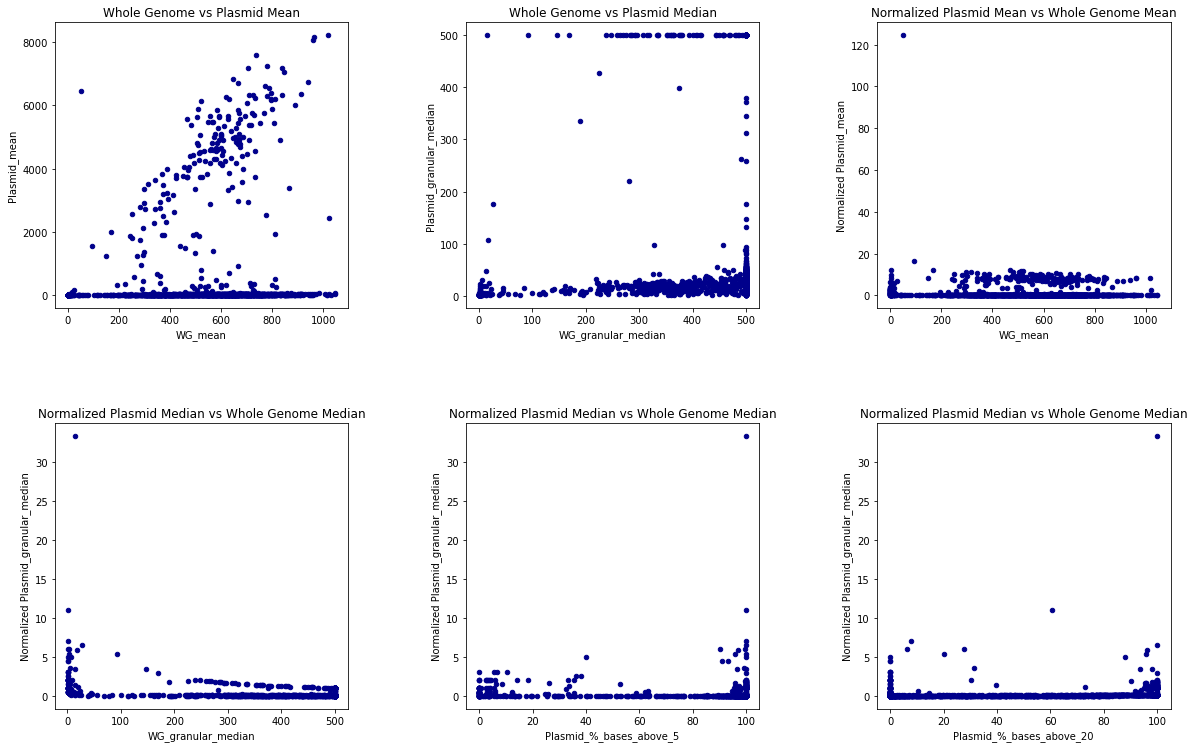

In [5]:
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(3, 3, 1)
ax1 = MRSA_RO1_depth_of_coverage.plot.scatter(x = 'WG_mean', y = 'Plasmid_mean', c = 'DarkBlue', title="Whole Genome vs Plasmid Mean", ax=ax)

ax = fig.add_subplot(3, 3, 2)
ax1 = MRSA_RO1_depth_of_coverage.plot.scatter(x = 'WG_granular_median', y = 'Plasmid_granular_median', c = 'DarkBlue', title="Whole Genome vs Plasmid Median", ax=ax)

ax = fig.add_subplot(3, 3, 3)
ax1 = MRSA_RO1_depth_of_coverage.plot.scatter(x = 'WG_mean', y = 'Normalized Plasmid_mean', c = 'DarkBlue', title="Normalized Plasmid Mean vs Whole Genome Mean", ax=ax)

ax = fig.add_subplot(3, 3, 4)
ax1 = MRSA_RO1_depth_of_coverage.plot.scatter(x = 'WG_granular_median', y = 'Normalized Plasmid_granular_median', c = 'DarkBlue', title="Normalized Plasmid Median vs Whole Genome Median", ax=ax)

ax = fig.add_subplot(3, 3, 5)
ax1 = MRSA_RO1_depth_of_coverage.plot.scatter(x = 'Plasmid_%_bases_above_5', y = 'Normalized Plasmid_granular_median', c = 'DarkBlue', title="Normalized Plasmid Median vs Whole Genome Median", ax=ax)

ax = fig.add_subplot(3, 3, 6)
ax1 = MRSA_RO1_depth_of_coverage.plot.scatter(x = 'Plasmid_%_bases_above_20', y = 'Normalized Plasmid_granular_median', c = 'DarkBlue', title="Normalized Plasmid Median vs Whole Genome Median", ax=ax)


In [6]:
# Deprecated - No longer using 100 bp window for visualization
plasmid_read_depth_100bp_window = pd.read_csv("/nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023_02_14_USA300-SUR4_plasmid_variant_calling/Mean_Depth_of_coverage_matrix.tsv", sep='\t', header=0)
plasmid_read_depth_100bp_window = plasmid_read_depth_100bp_window.replace('_depth_of_coverage_Mean_1000bp', '', regex=True)

plasmid_read_depth_100bp_window.drop(['Window'], axis=1)
plasmid_read_depth_100bp_window.head()
plasmid_read_depth_100bp_window = plasmid_read_depth_100bp_window.T
plasmid_read_depth_100bp_window_df = plasmid_read_depth_100bp_window.drop(['Window'], axis=0)

MRSA_RO1_samples_below_threshold = MRSA_RO1_depth_of_coverage[(MRSA_RO1_depth_of_coverage['Normalized Plasmid_granular_median'] < 1) & (MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_5'] < 80)]['sample_id']

plasmid_read_depth_100bp_window_df['sample_id'] = plasmid_read_depth_100bp_window_df.index

#plasmid_read_depth_100bp_window_df[plasmid_read_depth_100bp_window_df['sample_id'].isin(Project_BAA_MRSA_CO_HA_samples_below_threshold.tolist())]
plasmid_read_depth_100bp_window_df_samples_below_threshold = plasmid_read_depth_100bp_window_df.loc[plasmid_read_depth_100bp_window_df['sample_id'].isin(MRSA_RO1_samples_below_threshold.tolist())]

plasmid_read_depth_100bp_window_df_samples_below_threshold = plasmid_read_depth_100bp_window_df_samples_below_threshold.drop(['sample_id'], axis=1)

In [7]:
# import seaborn as sns
# plt.rcParams['figure.figsize'] = [100, 100]
#sns.clustermap(plasmid_read_depth_100bp_window_df_samples_below_threshold, xticklabels=True, yticklabels=True, cmap="YlGnBu", col_cluster=False, figsize=(20,20), mask=(plasmid_read_depth_100bp_window_df_samples_below_threshold==0))
#sns.clustermap(plasmid_read_depth_100bp_window, xticklabels=True, yticklabels=True, cmap="YlGnBu", col_cluster=False, figsize=(20,20), vmax = 100, mask=(plasmid_read_depth_100bp_window==0))

In [8]:
os.chdir("/nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023_02_14_USA300-SUR4_plasmid_variant_calling/")

import glob
#list_of_files = sorted(glob.glob("/nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2019_Project_BAA_MRSA_CO_HA/2023_02_14_USA300-SUR4_plasmid_variant_calling//*/*/*_depth_of_coverage"))
list_of_files = glob.glob('./MRSA_CM_*/*_stats_results/*_depth_of_coverage')



paste_mean_file = "paste Gene.txt "
paste_median_file = "paste Gene.txt "
paste_norm_mean_file = "paste Gene.txt "
paste_norm_median_file = "paste Gene.txt "

count = 0
for file in list_of_files:
    #file = "MRSA_CO_HA_533_/MRSA_CO_HA_533__stats_results/MRSA_CO_HA_533__depth_of_coverage"
    #df = pd.read_csv("MRSA_CO_HA_533_/MRSA_CO_HA_533__stats_results/MRSA_CO_HA_533__depth_of_coverage", sep=',', header=0)
    # print("Analyzing - %s" % file)
    columnname = file.split('/')[1]
    sample_id = columnname.rstrip("_")
    # print(columnname)
    df = pd.read_csv(file, sep=',', header=0)
    df = df.replace(['NZ_CP014374.1:'], '', regex=True)
    df = df.astype({'Locus':'int'})
    df = df.astype({'Total_Depth':'int'})
    # df.apply(pd.to_numeric)
    #df['Gene'] = np.where(((df['Locus']<=477) & (df['Locus']>=1)), "replication/maintenance protein RepL", 0)
    df['Gene'] = np.where(df['Locus']<=477, 'replication/maintenance protein RepL', '')

    df['Gene'] = np.where(((df['Locus']>=477) & (df['Locus']<=1172)), 'Non-coding', '')

    def label_race (row):
        if row['Locus'] <= 477:
            return 'replication/maintenance protein RepL'
        if row['Locus'] <= 1172:
            return 'Non-coding 1'
        if row['Locus'] <= 1231:
            return '23S rRNA methylase leader peptide ErmCL'
        elif row['Locus'] <= 1291:
            return 'Non-coding 2'
        elif row['Locus'] <= 2026:
            return '23S rRNA (adenine(2058)-N(6))-methyltransferase Erm(C)'
        elif row['Locus'] <= 2500:
            return 'Non-coding 3'
    if sample_id in str(MRSA_RO1_depth_of_coverage['sample_id']):
        count = count + 1
        df['Gene'] = df.apply(lambda row: label_race(row), axis=1)

        # print("Analyzing - %s" % file)
        # gene_mean = df.groupby('Gene', sort=False, as_index=False)['Total_Depth'].transform().convert_dtypes()
        # gene_median = df.groupby('Gene', sort=False, as_index=False)['Total_Depth'].median().convert_dtypes()
        
        WG_mean = float(MRSA_RO1_depth_of_coverage.loc[MRSA_RO1_depth_of_coverage['sample_id'] == sample_id, 'WG_mean'].iloc[0])
        WG_median = float(MRSA_RO1_depth_of_coverage.loc[MRSA_RO1_depth_of_coverage['sample_id'] == sample_id, 'WG_granular_median'].iloc[0])
        
        # print(WG_mean)
        # print(WG_median)
        
        gene_mean = df.groupby('Gene', sort=False, as_index=False)['Total_Depth'].mean()
        gene_median = df.groupby('Gene', sort=False, as_index=False)['Total_Depth'].median()
        
        gene_normalized_mean = df.groupby('Gene', sort=False, as_index=False).apply(lambda x: x['Total_Depth'].mean()/WG_mean)
        gene_normalized_median = df.groupby('Gene', sort=False, as_index=False).apply(lambda x: x['Total_Depth'].median()/WG_median)
        
        # print(gene_normalized_median.columns)
        

        # gene_normalized_mean = gene_mean / WG_mean
        # gene_normalized_median = gene_median / WG_median

        #gene_normalized_mean = gene_mean / float(MRSA_RO1_depth_of_coverage.loc[MRSA_RO1_depth_of_coverage['sample_id'] == sample_id, 'WG_mean'].iloc[0])
        #gene_normalized_median = gene_median / float(MRSA_RO1_depth_of_coverage.loc[MRSA_RO1_depth_of_coverage['sample_id'] == sample_id, 'WG_granular_median'].iloc[0])


        gene_median_file = file.replace('_depth_of_coverage', '_Gene_Median_Depth.csv')
        gene_mean_file = file.replace('_depth_of_coverage', '_Gene_Mean_Depth.csv')
        gene_norm_median_file = file.replace('_depth_of_coverage', '_Gene_Normalized_Median_Depth.csv')
        gene_norm_mean_file = file.replace('_depth_of_coverage', '_Gene_Normalized_Mean_Depth.csv')

        paste_mean_file = paste_mean_file + " %s" % gene_mean_file
        paste_median_file = paste_median_file + " %s" % gene_median_file
        paste_norm_mean_file = paste_norm_mean_file + " %s" % gene_norm_mean_file
        paste_norm_median_file = paste_norm_median_file + " %s" % gene_norm_median_file

        gene_mean.rename(columns = {'Total_Depth': columnname}, inplace = True)
        gene_median.rename(columns = {'Total_Depth': columnname}, inplace = True)
        # gene_normalized_mean.rename(columns = {"": columnname})
        # gene_normalized_median.rename(columns = {"": columnname})
        gene_normalized_mean.columns.values[1] = columnname
        gene_normalized_median.columns.values[1] = columnname
        # print(gene_mean)
        # print(gene_normalized_mean)
        
        gene_median[columnname].to_csv(gene_median_file, index=False)
        gene_mean[columnname].to_csv(gene_mean_file, index=False)
        gene_normalized_median[columnname].to_csv(gene_norm_median_file, index=False)
        gene_normalized_mean[columnname].to_csv(gene_norm_mean_file, index=False)

paste_mean_file = paste_mean_file + " > Mean_Gene_Depth.csv"
paste_median_file = paste_median_file + " > Median_Gene_Depth.csv"
paste_norm_mean_file = paste_norm_mean_file + " > Mean_Normalized_Gene_Depth.csv"
paste_norm_median_file = paste_norm_median_file + " > Median_Normalized_Gene_Depth.csv"

f = open("Gene.txt", "w+")
f.write("\nRepL\nNon-coding 1\nErmCL\nNon-coding 2\nErm(C)\nNon-coding 3")
f.close()

f = open("paste_mean.sh", "w+")
f.write(paste_mean_file)
f.close()

f = open("paste_median.sh", "w+")
f.write(paste_median_file)
f.close()

f = open("paste_norm_mean.sh", "w+")
f.write(paste_norm_mean_file)
f.close()

f = open("paste_norm_median.sh", "w+")
f.write(paste_norm_median_file)
f.close()

os.system("bash paste_mean.sh")
os.system("bash paste_median.sh")
os.system("bash paste_norm_mean.sh")
os.system("bash paste_norm_median.sh")

# import seaborn as sns
# # plt.rcParams['figure.figsize'] = [100, 100]
# sns.clustermap(plasmid_gene_read_depth, xticklabels=True, yticklabels=True, cmap="YlGnBu", col_cluster=False, figsize=(20,20), vmax = 100, mask=(plasmid_gene_read_depth==0))

0

In [9]:
os.chdir("/nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023_02_14_USA300-SUR4_plasmid_variant_calling/")
plasmid_gene_read_depth = pd.read_csv("Mean_Normalized_Gene_Depth.csv", sep='\t', header=0)
plasmid_gene_read_depth = plasmid_gene_read_depth.replace('_depth_of_coverage_Mean_1000bp', '', regex=True)
plasmid_gene_read_depth = plasmid_gene_read_depth.T
new_header = plasmid_gene_read_depth.iloc[0] #grab the first row for the header
plasmid_gene_read_depth = plasmid_gene_read_depth[1:] #take the data less the header row
plasmid_gene_read_depth.columns = new_header #set the header row as the df header
# plasmid_gene_read_depth.astype('int32').dtypes
plasmid_gene_read_depth[["RepL", "Non-coding 1", "ErmCL", "Non-coding 2", "Erm(C)", "Non-coding 3"]] = plasmid_gene_read_depth[["RepL", "Non-coding 1", "ErmCL", "Non-coding 2", "Erm(C)", "Non-coding 3"]].apply(pd.to_numeric)
plasmid_gene_read_depth['sample_id'] = plasmid_gene_read_depth.index
cols = plasmid_gene_read_depth.columns.tolist()
cols = cols[-1:] + cols[:-1]
plasmid_gene_read_depth = plasmid_gene_read_depth[cols]
plasmid_gene_read_depth.to_csv('Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth.csv', index=False)

In [ ]:
setwd("/nfs//turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection")
# {r}
# Load the packages
cran_packages <- c("BiocManager","phytools","ggplot2","tidyverse","readxl","randomcoloR","cowplot","printr")
# BiocManager packages
BiocManager_packages <- c("ggtree","ggnewscale")
lapply(cran_packages,library,character.only=T)
lapply(BiocManager_packages,library,character.only=T)
library(treeio)
library(pheatmap)

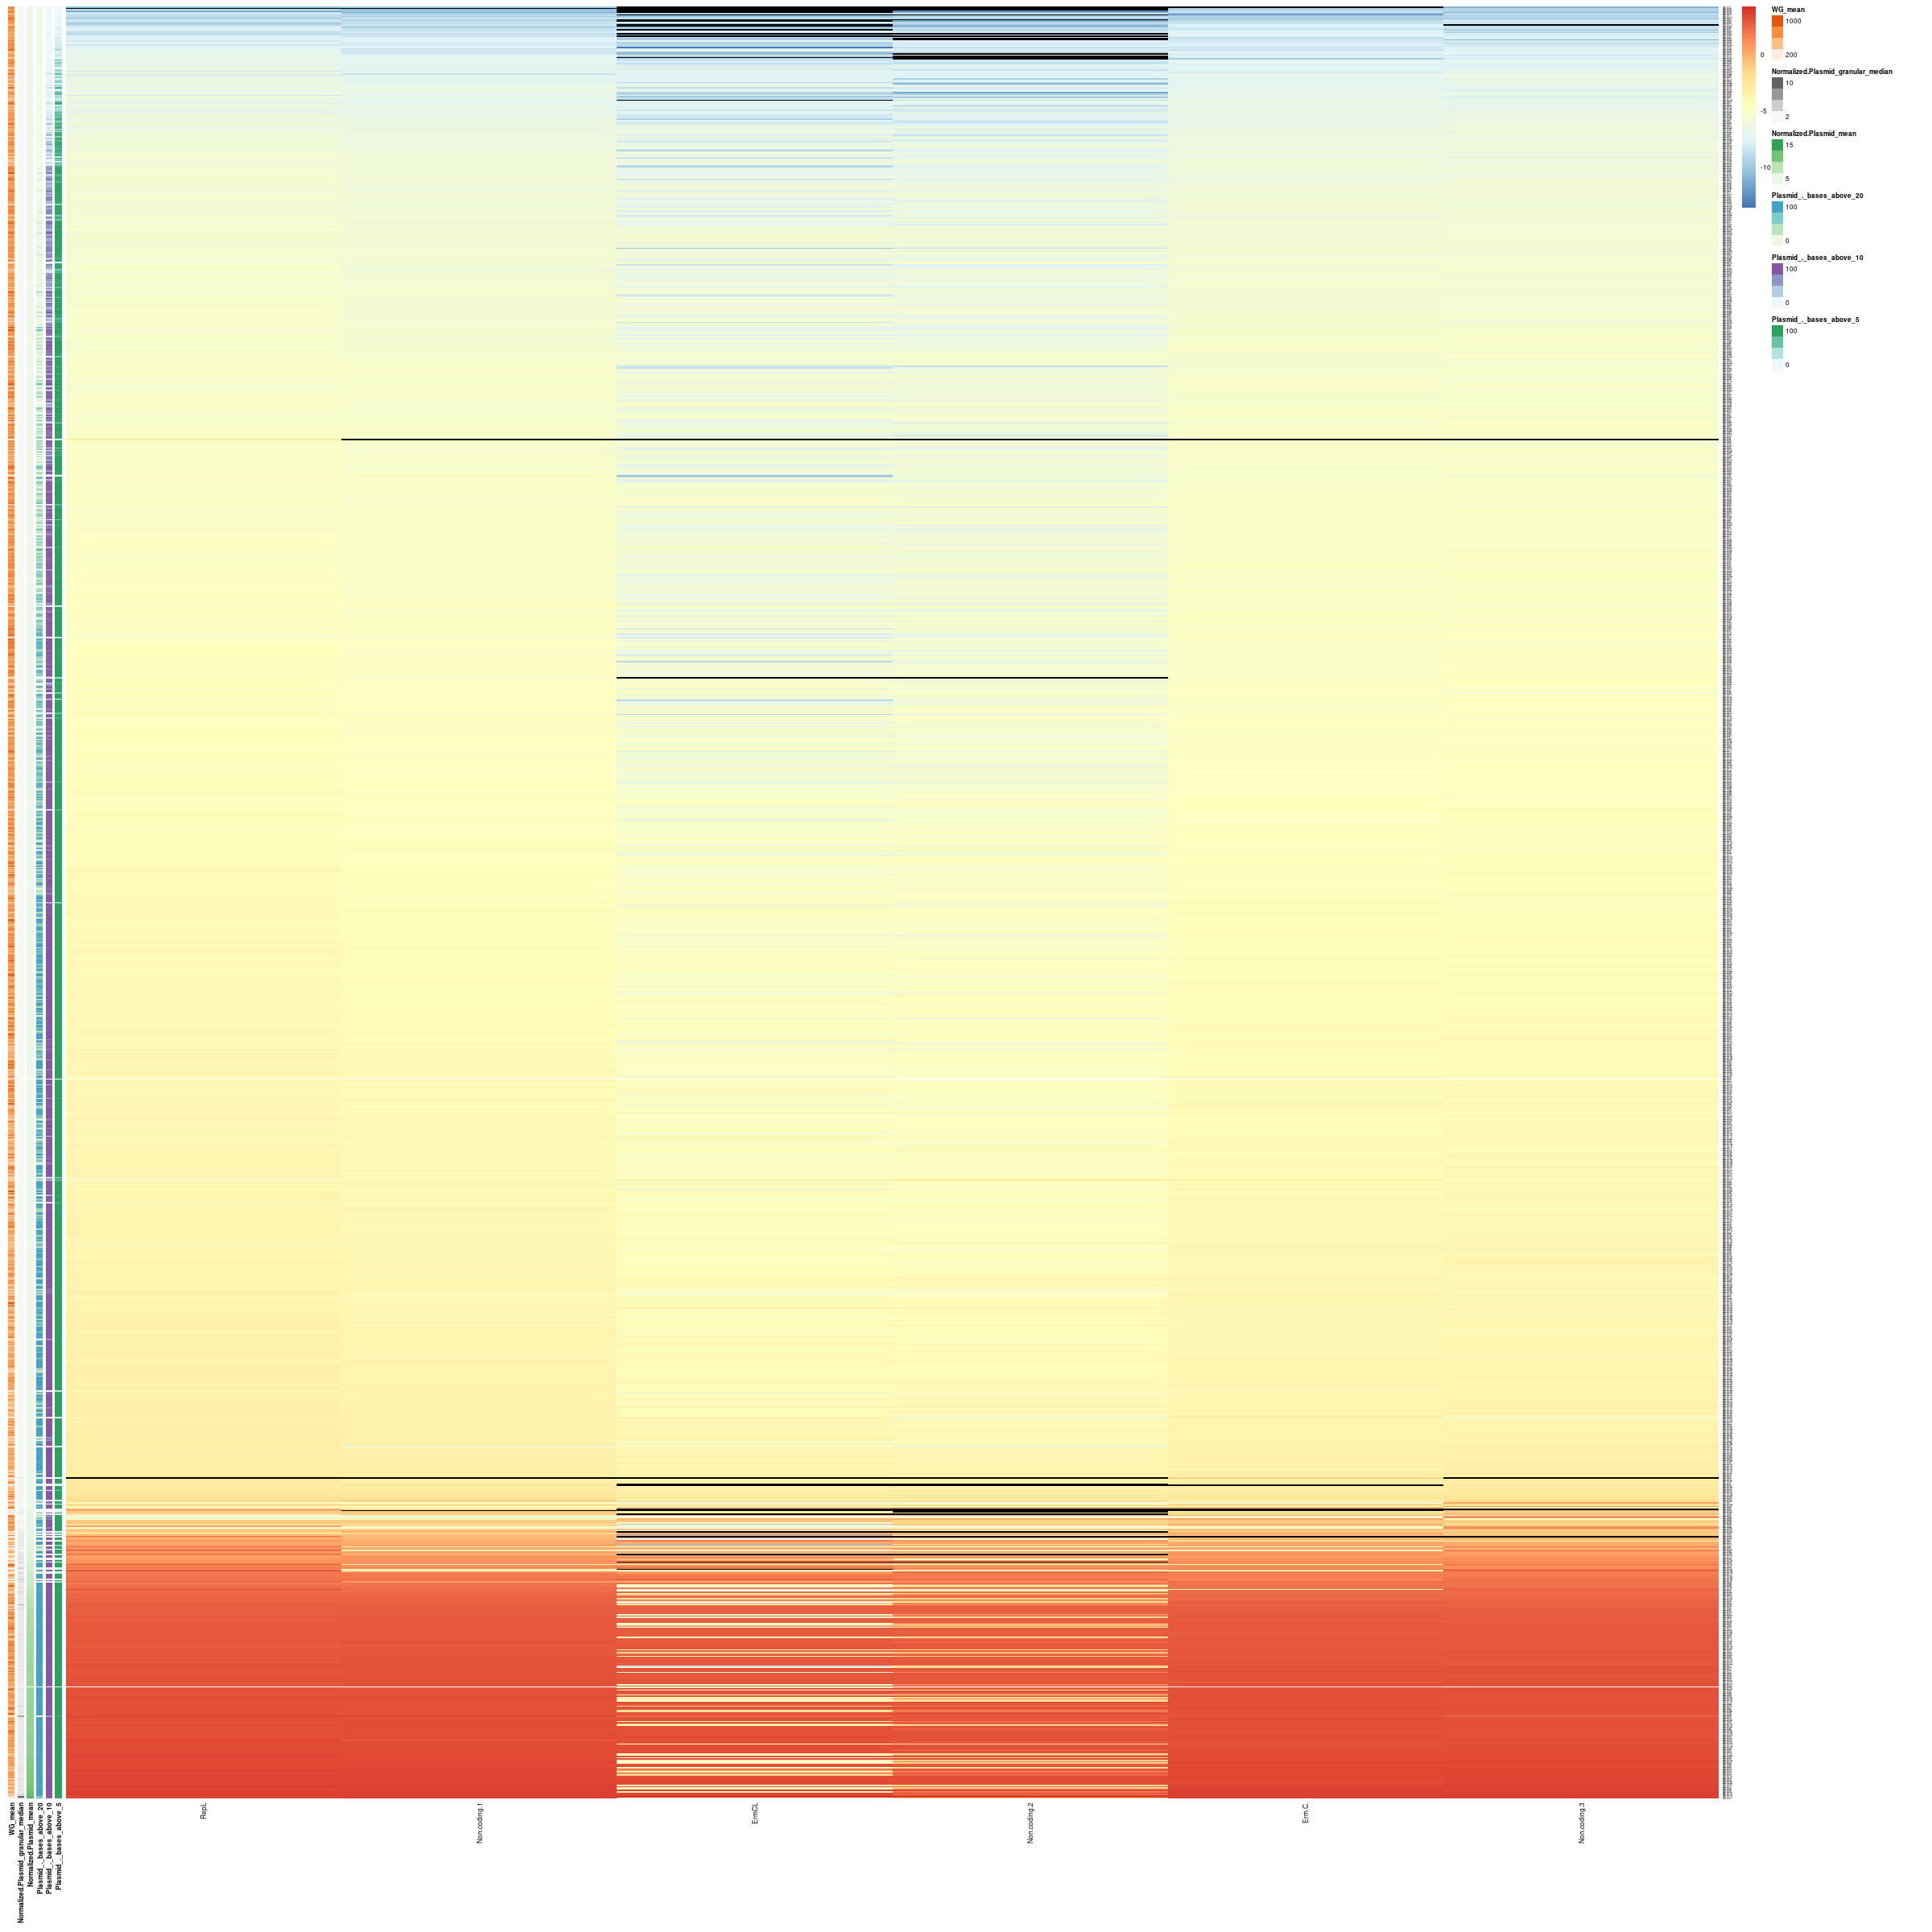

In [3]:
options(repr.plot.width = 20, repr.plot.height = 20)

# Read in DepthofCoverage Metadata and Gene Read Depth
MRSA_RO1_DepthofCoverage_metadata <- read.csv('Project_MRSA_RO1_depth_of_coverage_metadata.csv', row.names = 1)

MRSA_RO1_Gene_DepthofCoverage <- read.csv('Project_MRSA_RO1_USA300_SUR4_Gene_Depth.csv', row.names = 1)
MRSA_RO1_Norm_Mean_Gene_DepthofCoverage <- read.csv('Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth.csv', row.names = 1)

#Assign rownames to the Gene Read Depth dataframes
MRSA_RO1_Gene_DepthofCoverage$Samples <- rownames(MRSA_RO1_Gene_DepthofCoverage)
MRSA_RO1_Norm_Mean_Gene_DepthofCoverage$Samples <- rownames(MRSA_RO1_Norm_Mean_Gene_DepthofCoverage)

# Drop NEG CONTRL Samples from the dataframe
MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL <- MRSA_RO1_Gene_DepthofCoverage[-which(grepl("*NEG_CTL*", MRSA_RO1_Gene_DepthofCoverage$Samples)),]
MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL <- MRSA_RO1_Norm_Mean_Gene_DepthofCoverage[-which(grepl("*NEG_CTL*", MRSA_RO1_Norm_Mean_Gene_DepthofCoverage$Samples)),]

# Drop Outlier Sample MRSA_CM_1385 from the dataframe
MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier <- MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL[-which(grepl("MRSA_CM_1385", MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL$Samples)),]
#MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier <- MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL[-which(grepl("MRSA_CM_1385", MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL$Samples)),]
MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier <- MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL

# Drop usused column Samples
MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column <- subset(MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier, select = -c(Samples) )
MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column <- subset(MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier, select = -c(Samples) )

#colnames(MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier) <- c("RepL", "Non-coding 1", "ErmCL", "Non-coding 2", "Erm(C)", "Non-coding 3")

#annotation_row <- MRSA_RO1_DepthofCoverage_metadata[ , c("Plasmid_._bases_above_20", "Normalized.Plasmid_mean", "Normalized.Plasmid_granular_median", "WG_mean")]

# Extract Annotation rows from Depth of Coverage Metadata
annotation_row <- MRSA_RO1_DepthofCoverage_metadata[ , c("Plasmid_._bases_above_5", "Plasmid_._bases_above_10", "Plasmid_._bases_above_20", "Normalized.Plasmid_mean", "Normalized.Plasmid_granular_median", "WG_mean")]

# Assign rownames
annotation_row$Samples <- rownames(annotation_row)

# Drop NEG CTRL samples
annotation_row_exclude_NEG_CTRL <- annotation_row[-which(grepl("*NEG_CTL*", annotation_row$Samples)),]

# Drop outlier sample MRSA_CM_1385
annotation_row_exclude_NEG_CTRL_drop_outlier <- annotation_row_exclude_NEG_CTRL[-which(grepl("MRSA_CM_1385", annotation_row_exclude_NEG_CTRL$Samples)),]

# Sort row Annotations by Normalized.Plasmid_mean
annotation_row_exclude_NEG_CTRL_drop_outlier_sorted <- annotation_row_exclude_NEG_CTRL_drop_outlier[order(annotation_row_exclude_NEG_CTRL_drop_outlier$Normalized.Plasmid_mean),]

# Drop the unused Samples column
annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column_sorted <- subset(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted, select = -c(Samples) )

#colnames(annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column) <- c("%Basesabove20", "Norm.PlasmidMean", "Norm.PlasmidMedian", "WG_mean")

# Rename column names
colnames(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted) <- c("%Basesabove5", "%Basesabove10", "%Basesabove20", "Norm.PlasmidMean", "Norm.PlasmidMedian", "WG_mean")

#pheatmap(MRSA_RO1_Gene_DepthofCoverage, annotation_row = annotation_row, cluster_cols =  FALSE, angle_col = 45, fontsize_row=1, border_color=NA, fontsize = 5)

#MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[order(row.names(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted)), ]

#MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[order(row.names(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted)), ]

MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[match(rownames(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted), rownames(MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column)), ]
MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[match(rownames(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted), rownames(MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column)), ]


MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log <- log2(MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered)

is.na(MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log) <- sapply(MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log, is.infinite)

# pdf(file = "MRSA_RO1_Normalized_mean_Gene_DepthofCoverage.pdf",   # The directory you want to save the file in
#     width = 12, # The width of the plot in inches
#     height = 12) 
    
# pheatmap(MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered, annotation_row = annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column_sorted, cluster_cols =  FALSE, cluster_rows =  FALSE, angle_col = 90, fontsize_row=1, border_color=NA, fontsize = 5)

# dev.off()


# pdf(file = "MRSA_RO1_Normalized_mean_Gene_DepthofCoverage_log.pdf",   # The directory you want to save the file in
#     width = 12, # The width of the plot in inches
#     height = 12) 

pheatmap(MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log, annotation_row = annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column_sorted, cluster_cols =  FALSE, cluster_rows =  FALSE, angle_col = 90, fontsize_row=1, border_color=NA, fontsize = 5, na_col = "black")

# dev.off()


#### Processing MRSA Jail Samples

In [1]:
# Import Libraries and set path
import numpy as np
import pandas as pd
from IPython.display import HTML
import os
import readline
import argparse
from itertools import islice
import subprocess
import matplotlib.pyplot as plt

# Set this option for pandas to print data
pd.set_option("display.max_rows", None, "display.max_columns", None)

os.chdir("/nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection")
os.chdir("/nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection")

In [2]:
# !head -n1 /nfs/esnitkin/Project_MRSA/Analysis/2016-MRSA_jail_project/2021_03_04_USA300-SUR4_plasmid_variant_calling/MRSA_jail_347/MRSA_jail_347_stats_results/MRSA_jail_347_depth_of_coverage.sample_summary > /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection/MRSA_Jail_SUR4_Plasmid_depth_of_coverage.sample_summary.tsv

# !for i in `ls /nfs/esnitkin/Project_MRSA/Analysis/2016-MRSA_jail_project/2021_03_04_USA300-SUR4_plasmid_variant_calling/MRSA_jail_*/*_stats_results/*_depth_of_coverage.sample_summary`; do grep '^MRSA' $i; done >> /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection/MRSA_Jail_SUR4_Plasmid_depth_of_coverage.sample_summary.tsv

# 2022_07_14_Jail_CDC_combined_variant_calling doesn't contain all the MRSA Jail samples; Reran MRSA USA300 workflow 
# !head -n1 /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2019_Project_BAA_MRSA_CO_HA/2022_07_14_Jail_CDC_combined_variant_calling/MRSA_jail_347/*_stats_results/*_depth_of_coverage.sample_summary > /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection/MRSA_Jail_USA300_depth_of_coverage.sample_summary.tsv
# !for i in `ls /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2019_Project_BAA_MRSA_CO_HA/2022_07_14_Jail_CDC_combined_variant_calling/MRSA_jail_*/*_stats_results/*_depth_of_coverage.sample_summary`; do grep '^MRSA' $i; done >> /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection/MRSA_Jail_USA300_depth_of_coverage.sample_summary.tsv

#!head -n1 /scratch/esnitkin_root/esnitkin/apirani/Project_MRSA/Analysis/2016-MRSA_jail_project/2023_03_15_variant_calling/MRSA_jail_327/MRSA_jail_*_stats_results/*depth_of_coverage.sample_summary > /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection/MRSA_Jail_USA300_depth_of_coverage.sample_summary.tsv
#!for i in `ls /scratch/esnitkin_root/esnitkin/apirani/Project_MRSA/Analysis/2016-MRSA_jail_project/2023_03_15_variant_calling/MRSA_jail_*/MRSA_jail_*_stats_results/*depth_of_coverage.sample_summary`; do grep '^MRSA' $i; done >> /nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection/MRSA_Jail_USA300_depth_of_coverage.sample_summary.tsv

In [3]:
MRSA_jail_SUR4_Plasmid_depth_of_coverage = pd.read_csv("MRSA_Jail_SUR4_Plasmid_depth_of_coverage.sample_summary.tsv", sep='\t', header=0, dtype = str)

MRSA_jail_USA300_depth_of_coverage = pd.read_csv("MRSA_Jail_USA300_depth_of_coverage.sample_summary.tsv", sep=',', header=0, dtype = str)

# Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.rename(columns={"mean": "WG Mean Read Depth"})
# Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage.rename(columns={"mean": "Plasmid Mean Read Depth"})

MRSA_jail_USA300_depth_of_coverage = MRSA_jail_USA300_depth_of_coverage.add_prefix('WG_')
MRSA_jail_SUR4_Plasmid_depth_of_coverage = MRSA_jail_SUR4_Plasmid_depth_of_coverage.add_prefix('Plasmid_')
MRSA_jail_USA300_depth_of_coverage = MRSA_jail_USA300_depth_of_coverage.rename(columns={"WG_sample_id": "sample_id"})
MRSA_jail_SUR4_Plasmid_depth_of_coverage = MRSA_jail_SUR4_Plasmid_depth_of_coverage.rename(columns={"Plasmid_sample_id": "sample_id"})

MRSA_jail_depth_of_coverage = pd.merge(MRSA_jail_USA300_depth_of_coverage, MRSA_jail_SUR4_Plasmid_depth_of_coverage, on=["sample_id", "sample_id"])
MRSA_jail_depth_of_coverage = MRSA_jail_depth_of_coverage.replace(['_R1.fastq.gz'], '', regex=True)

MRSA_jail_depth_of_coverage['WG_mean'] = MRSA_jail_depth_of_coverage['WG_mean'].astype(float)
MRSA_jail_depth_of_coverage['Plasmid_mean'] = MRSA_jail_depth_of_coverage['Plasmid_mean'].astype(float)
MRSA_jail_depth_of_coverage['WG_granular_median'] = MRSA_jail_depth_of_coverage['WG_granular_median'].astype(float)
MRSA_jail_depth_of_coverage['Plasmid_granular_median'] = MRSA_jail_depth_of_coverage['Plasmid_granular_median'].astype(float)
MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_1'] = MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_1'].astype(float)
MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_5'] = MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_5'].astype(float)
MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_20'] = MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_20'].astype(float)

# MRSA_jail_depth_of_coverage.columns

MRSA_jail_depth_of_coverage['Normalized Plasmid_mean'] = MRSA_jail_depth_of_coverage['Plasmid_mean'] / MRSA_jail_depth_of_coverage['WG_mean']

MRSA_jail_depth_of_coverage['Normalized Plasmid_granular_median'] = MRSA_jail_depth_of_coverage['Plasmid_granular_median'] / MRSA_jail_depth_of_coverage['WG_granular_median']


MRSA_jail_depth_of_coverage.to_csv('Project_MRSA_Jail_depth_of_coverage_metadata.csv', index=False)

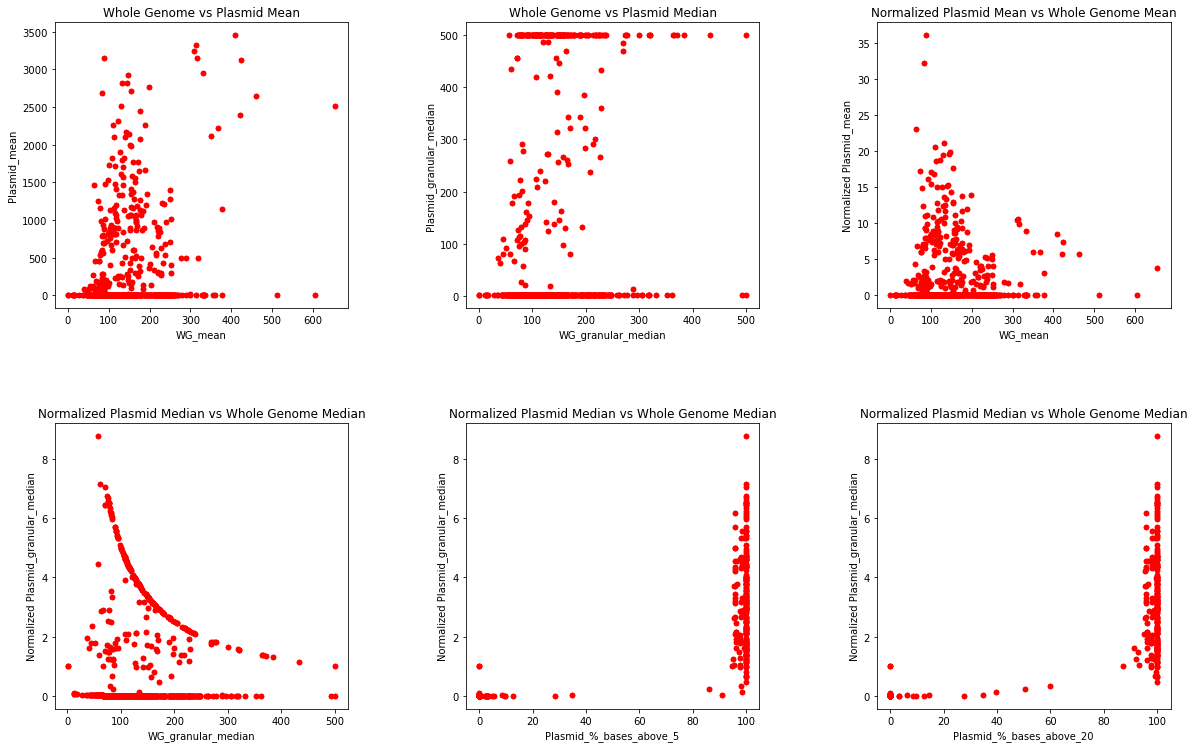

In [9]:
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(3, 3, 1)

ax1 = MRSA_jail_depth_of_coverage.plot.scatter(x = 'WG_mean', y = 'Plasmid_mean', c = 'red', title="Whole Genome vs Plasmid Mean", ax=ax)

ax = fig.add_subplot(3, 3, 2)
ax1 = MRSA_jail_depth_of_coverage.plot.scatter(x = 'WG_granular_median', y = 'Plasmid_granular_median', c = 'red', title="Whole Genome vs Plasmid Median", ax=ax)

MRSA_jail_depth_of_coverage['Normalized Plasmid_mean'] = MRSA_jail_depth_of_coverage['Plasmid_mean'] / MRSA_jail_depth_of_coverage['WG_mean']

MRSA_jail_depth_of_coverage['Normalized Plasmid_granular_median'] = MRSA_jail_depth_of_coverage['Plasmid_granular_median'] / MRSA_jail_depth_of_coverage['WG_granular_median']

ax = fig.add_subplot(3, 3, 3)
ax1 = MRSA_jail_depth_of_coverage.plot.scatter(x = 'WG_mean', y = 'Normalized Plasmid_mean', c = 'red', title="Normalized Plasmid Mean vs Whole Genome Mean", ax=ax)

ax = fig.add_subplot(3, 3, 4)
ax1 = MRSA_jail_depth_of_coverage.plot.scatter(x = 'WG_granular_median', y = 'Normalized Plasmid_granular_median', c = 'red', title="Normalized Plasmid Median vs Whole Genome Median", ax=ax)

ax = fig.add_subplot(3, 3, 5)
ax1 = MRSA_jail_depth_of_coverage.plot.scatter(x = 'Plasmid_%_bases_above_5', y = 'Normalized Plasmid_granular_median', c = 'red', title="Normalized Plasmid Median vs Whole Genome Median", ax=ax)

ax = fig.add_subplot(3, 3, 6)
ax1 = MRSA_jail_depth_of_coverage.plot.scatter(x = 'Plasmid_%_bases_above_20', y = 'Normalized Plasmid_granular_median', c = 'red', title="Normalized Plasmid Median vs Whole Genome Median", ax=ax)

In [11]:
plasmid_read_depth_100bp_window = pd.read_csv("/nfs/esnitkin/Project_MRSA/Analysis/2016-MRSA_jail_project/2021_03_04_USA300-SUR4_plasmid_variant_calling/Mean_Depth_of_coverage_matrix.tsv", sep='\t', header=0)
plasmid_read_depth_100bp_window = plasmid_read_depth_100bp_window.replace('_depth_of_coverage_Mean_1000bp', '', regex=True)

plasmid_read_depth_100bp_window.drop(['Window'], axis=1)
plasmid_read_depth_100bp_window.head()
plasmid_read_depth_100bp_window = plasmid_read_depth_100bp_window.T
plasmid_read_depth_100bp_window_df = plasmid_read_depth_100bp_window.drop(['Window'], axis=0)

MRSA_jail_samples_below_threshold = MRSA_jail_depth_of_coverage[(MRSA_jail_depth_of_coverage['Normalized Plasmid_granular_median'] < 1) & (MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_5'] < 80)]['sample_id']

plasmid_read_depth_100bp_window_df['sample_id'] = plasmid_read_depth_100bp_window_df.index

#plasmid_read_depth_100bp_window_df[plasmid_read_depth_100bp_window_df['sample_id'].isin(Project_BAA_MRSA_CO_HA_samples_below_threshold.tolist())]
plasmid_read_depth_100bp_window_df_samples_below_threshold = plasmid_read_depth_100bp_window_df.loc[plasmid_read_depth_100bp_window_df['sample_id'].isin(MRSA_jail_samples_below_threshold.tolist())]

plasmid_read_depth_100bp_window_df_samples_below_threshold = plasmid_read_depth_100bp_window_df_samples_below_threshold.drop(['sample_id'], axis=1)

In [12]:
# import seaborn as sns
# # plt.rcParams['figure.figsize'] = [100, 100]
# sns.clustermap(plasmid_read_depth_100bp_window_df_samples_below_threshold, xticklabels=True, yticklabels=True, cmap="YlGnBu", col_cluster=False, figsize=(20,20),  mask=(plasmid_read_depth_100bp_window_df_samples_below_threshold==0))
# sns.clustermap(plasmid_read_depth_100bp_window, xticklabels=True, yticklabels=True, cmap="YlGnBu", col_cluster=False, figsize=(20,20), vmax = 100, mask=(plasmid_read_depth_100bp_window==0))

In [ ]:
os.chdir("/nfs/esnitkin/Project_MRSA/Analysis/2016-MRSA_jail_project/2021_03_04_USA300-SUR4_plasmid_variant_calling/")

import glob
#list_of_files = sorted(glob.glob("/nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2019_Project_BAA_MRSA_CO_HA/2023_02_14_USA300-SUR4_plasmid_variant_calling//*/*/*_depth_of_coverage"))
list_of_files = glob.glob('./MRSA_jail_*/*_stats_results/*_depth_of_coverage')


paste_mean_file = "paste Gene.txt "
paste_median_file = "paste Gene.txt "
paste_norm_mean_file = "paste Gene.txt "
paste_norm_median_file = "paste Gene.txt "

for file in list_of_files:
    #file = "MRSA_CO_HA_533_/MRSA_CO_HA_533__stats_results/MRSA_CO_HA_533__depth_of_coverage"
    #df = pd.read_csv("MRSA_CO_HA_533_/MRSA_CO_HA_533__stats_results/MRSA_CO_HA_533__depth_of_coverage", sep=',', header=0)
    # print("Analyzing - %s" % file)
    columnname = file.split('/')[1]
    sample_id = columnname.rstrip("_")
    # print(columnname)
    df = pd.read_csv(file, sep='\t', header=0)
    df = df.replace(['NZ_CP014374.1:'], '', regex=True)
    df = df.astype({'Locus':'int'})
    df = df.astype({'Total_Depth':'int'})
    # df.apply(pd.to_numeric)
    #df['Gene'] = np.where(((df['Locus']<=477) & (df['Locus']>=1)), "replication/maintenance protein RepL", 0)
    df['Gene'] = np.where(df['Locus']<=477, 'replication/maintenance protein RepL', '')

    df['Gene'] = np.where(((df['Locus']>=477) & (df['Locus']<=1172)), 'Non-coding', '')

    def label_race (row):
        if row['Locus'] <= 477:
            return 'replication/maintenance protein RepL'
        if row['Locus'] <= 1172:
            return 'Non-coding 1'
        if row['Locus'] <= 1231:
            return '23S rRNA methylase leader peptide ErmCL'
        elif row['Locus'] <= 1291:
            return 'Non-coding 2'
        elif row['Locus'] <= 2026:
            return '23S rRNA (adenine(2058)-N(6))-methyltransferase Erm(C)'
        elif row['Locus'] <= 2500:
            return 'Non-coding 3'
    if sample_id in str(MRSA_jail_depth_of_coverage['sample_id']):
        df['Gene'] = df.apply(lambda row: label_race(row), axis=1)

        # print("Analyzing - %s" % file)
        # gene_mean = df.groupby('Gene', sort=False, as_index=False)['Total_Depth'].transform().convert_dtypes()
        # gene_median = df.groupby('Gene', sort=False, as_index=False)['Total_Depth'].median().convert_dtypes()
        
        WG_mean = float(MRSA_jail_depth_of_coverage.loc[MRSA_jail_depth_of_coverage['sample_id'] == sample_id, 'WG_mean'].iloc[0])
        WG_median = float(MRSA_jail_depth_of_coverage.loc[MRSA_jail_depth_of_coverage['sample_id'] == sample_id, 'WG_granular_median'].iloc[0])
        
        # print(WG_mean)
        # print(WG_median)
        
        gene_mean = df.groupby('Gene', sort=False, as_index=False)['Total_Depth'].mean()
        gene_median = df.groupby('Gene', sort=False, as_index=False)['Total_Depth'].median()
        
        # gene_normalized_mean = df.groupby('Gene', sort=False, as_index=False).apply(lambda x: x['Total_Depth'].mean()/WG_mean)
        # gene_normalized_median = df.groupby('Gene', sort=False, as_index=False).apply(lambda x: x['Total_Depth'].median()/WG_median)
        
        try:
            gene_normalized_mean = df.groupby('Gene', sort=False, as_index=False).apply(lambda x: x['Total_Depth'].mean()/WG_mean)
            gene_normalized_median = df.groupby('Gene', sort=False, as_index=False).apply(lambda x: x['Total_Depth'].median()/WG_median)

        except ZeroDivisionError:
            gene_normalized_mean = pd.DataFrame({'replication/maintenance protein RepL' : 0, 'Non-coding 1' : 0, '23S rRNA methylase leader peptide ErmCL' : 0, 'Non-coding 2' : 0, '23S rRNA (adenine(2058)-N(6))-methyltransferase Erm(C)' : 0, 'Non-coding 3' : 0})
            gene_normalized_median = pd.DataFrame({'replication/maintenance protein RepL' : 0, 'Non-coding 1' : 0, '23S rRNA methylase leader peptide ErmCL' : 0, 'Non-coding 2' : 0, '23S rRNA (adenine(2058)-N(6))-methyltransferase Erm(C)' : 0, 'Non-coding 3' : 0})

        # print(gene_normalized_median.columns)
        

        # gene_normalized_mean = gene_mean / WG_mean
        # gene_normalized_median = gene_median / WG_median

        #gene_normalized_mean = gene_mean / float(MRSA_RO1_depth_of_coverage.loc[MRSA_RO1_depth_of_coverage['sample_id'] == sample_id, 'WG_mean'].iloc[0])
        #gene_normalized_median = gene_median / float(MRSA_RO1_depth_of_coverage.loc[MRSA_RO1_depth_of_coverage['sample_id'] == sample_id, 'WG_granular_median'].iloc[0])


        gene_median_file = file.replace('_depth_of_coverage', '_Gene_Median_Depth.csv')
        gene_mean_file = file.replace('_depth_of_coverage', '_Gene_Mean_Depth.csv')
        gene_norm_median_file = file.replace('_depth_of_coverage', '_Gene_Normalized_Median_Depth.csv')
        gene_norm_mean_file = file.replace('_depth_of_coverage', '_Gene_Normalized_Mean_Depth.csv')

        paste_mean_file = paste_mean_file + " %s" % gene_mean_file
        paste_median_file = paste_median_file + " %s" % gene_median_file
        paste_norm_mean_file = paste_norm_mean_file + " %s" % gene_norm_mean_file
        paste_norm_median_file = paste_norm_median_file + " %s" % gene_norm_median_file

        gene_mean.rename(columns = {'Total_Depth': columnname}, inplace = True)
        gene_median.rename(columns = {'Total_Depth': columnname}, inplace = True)
        # gene_normalized_mean.rename(columns = {"": columnname})
        # gene_normalized_median.rename(columns = {"": columnname})
        gene_normalized_mean.columns.values[1] = columnname
        gene_normalized_median.columns.values[1] = columnname
        # print(gene_mean)
        # print(gene_normalized_mean)
        
        gene_median[columnname].to_csv(gene_median_file, index=False)
        gene_mean[columnname].to_csv(gene_mean_file, index=False)
        gene_normalized_median[columnname].to_csv(gene_norm_median_file, index=False)
        gene_normalized_mean[columnname].to_csv(gene_norm_mean_file, index=False)

paste_mean_file = paste_mean_file + " > Mean_Gene_Depth.csv"
paste_median_file = paste_median_file + " > Median_Gene_Depth.csv"
paste_norm_mean_file = paste_norm_mean_file + " > Mean_Normalized_Gene_Depth.csv"
paste_norm_median_file = paste_norm_median_file + " > Median_Normalized_Gene_Depth.csv"

f = open("Gene.txt", "w+")
f.write("\nRepL\nNon-coding 1\nErmCL\nNon-coding 2\nErm(C)\nNon-coding 3")
f.close()

f = open("paste_mean.sh", "w+")
f.write(paste_mean_file)
f.close()

f = open("paste_median.sh", "w+")
f.write(paste_median_file)
f.close()

f = open("paste_norm_mean.sh", "w+")
f.write(paste_norm_mean_file)
f.close()

f = open("paste_norm_median.sh", "w+")
f.write(paste_norm_median_file)
f.close()

os.system("bash paste_mean.sh")
os.system("bash paste_median.sh")
os.system("bash paste_norm_mean.sh")
os.system("bash paste_norm_median.sh")


# import seaborn as sns
# # plt.rcParams['figure.figsize'] = [100, 100]
# sns.clustermap(plasmid_gene_read_depth, xticklabels=True, yticklabels=True, cmap="YlGnBu", col_cluster=False, figsize=(20,20), vmax = 100, mask=(plasmid_gene_read_depth==0))

In [13]:
os.chdir("/nfs/esnitkin/Project_MRSA/Analysis/2016-MRSA_jail_project/2021_03_04_USA300-SUR4_plasmid_variant_calling/")
plasmid_gene_read_depth = pd.read_csv("Mean_Normalized_Gene_Depth.csv", sep='\t', header=0)
plasmid_gene_read_depth = plasmid_gene_read_depth.replace('_depth_of_coverage_Mean_1000bp', '', regex=True)

plasmid_gene_read_depth = plasmid_gene_read_depth.T

new_header = plasmid_gene_read_depth.iloc[0] #grab the first row for the header
plasmid_gene_read_depth = plasmid_gene_read_depth[1:] #take the data less the header row
plasmid_gene_read_depth.columns = new_header #set the header row as the df header
# plasmid_gene_read_depth.astype('int32').dtypes
plasmid_gene_read_depth[["RepL", "Non-coding 1", "ErmCL", "Non-coding 2", "Erm(C)", "Non-coding 3"]] = plasmid_gene_read_depth[["RepL", "Non-coding 1", "ErmCL", "Non-coding 2", "Erm(C)", "Non-coding 3"]].apply(pd.to_numeric)


plasmid_gene_read_depth['sample_id'] = plasmid_gene_read_depth.index
cols = plasmid_gene_read_depth.columns.tolist()
cols = cols[-1:] + cols[:-1]
plasmid_gene_read_depth = plasmid_gene_read_depth[cols]
plasmid_gene_read_depth.to_csv('Project_MRSA_jail_USA300_SUR4_Normalized_Mean_Gene_Depth.csv', index=False)

In [ ]:
setwd("/nfs//turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection")

# {r}
# Load the packages
cran_packages <- c("BiocManager","phytools","ggplot2","tidyverse","readxl","randomcoloR","cowplot","printr")
# BiocManager packages
BiocManager_packages <- c("ggtree","ggnewscale")
lapply(cran_packages,library,character.only=T)
lapply(BiocManager_packages,library,character.only=T)
library(treeio)
library(pheatmap)

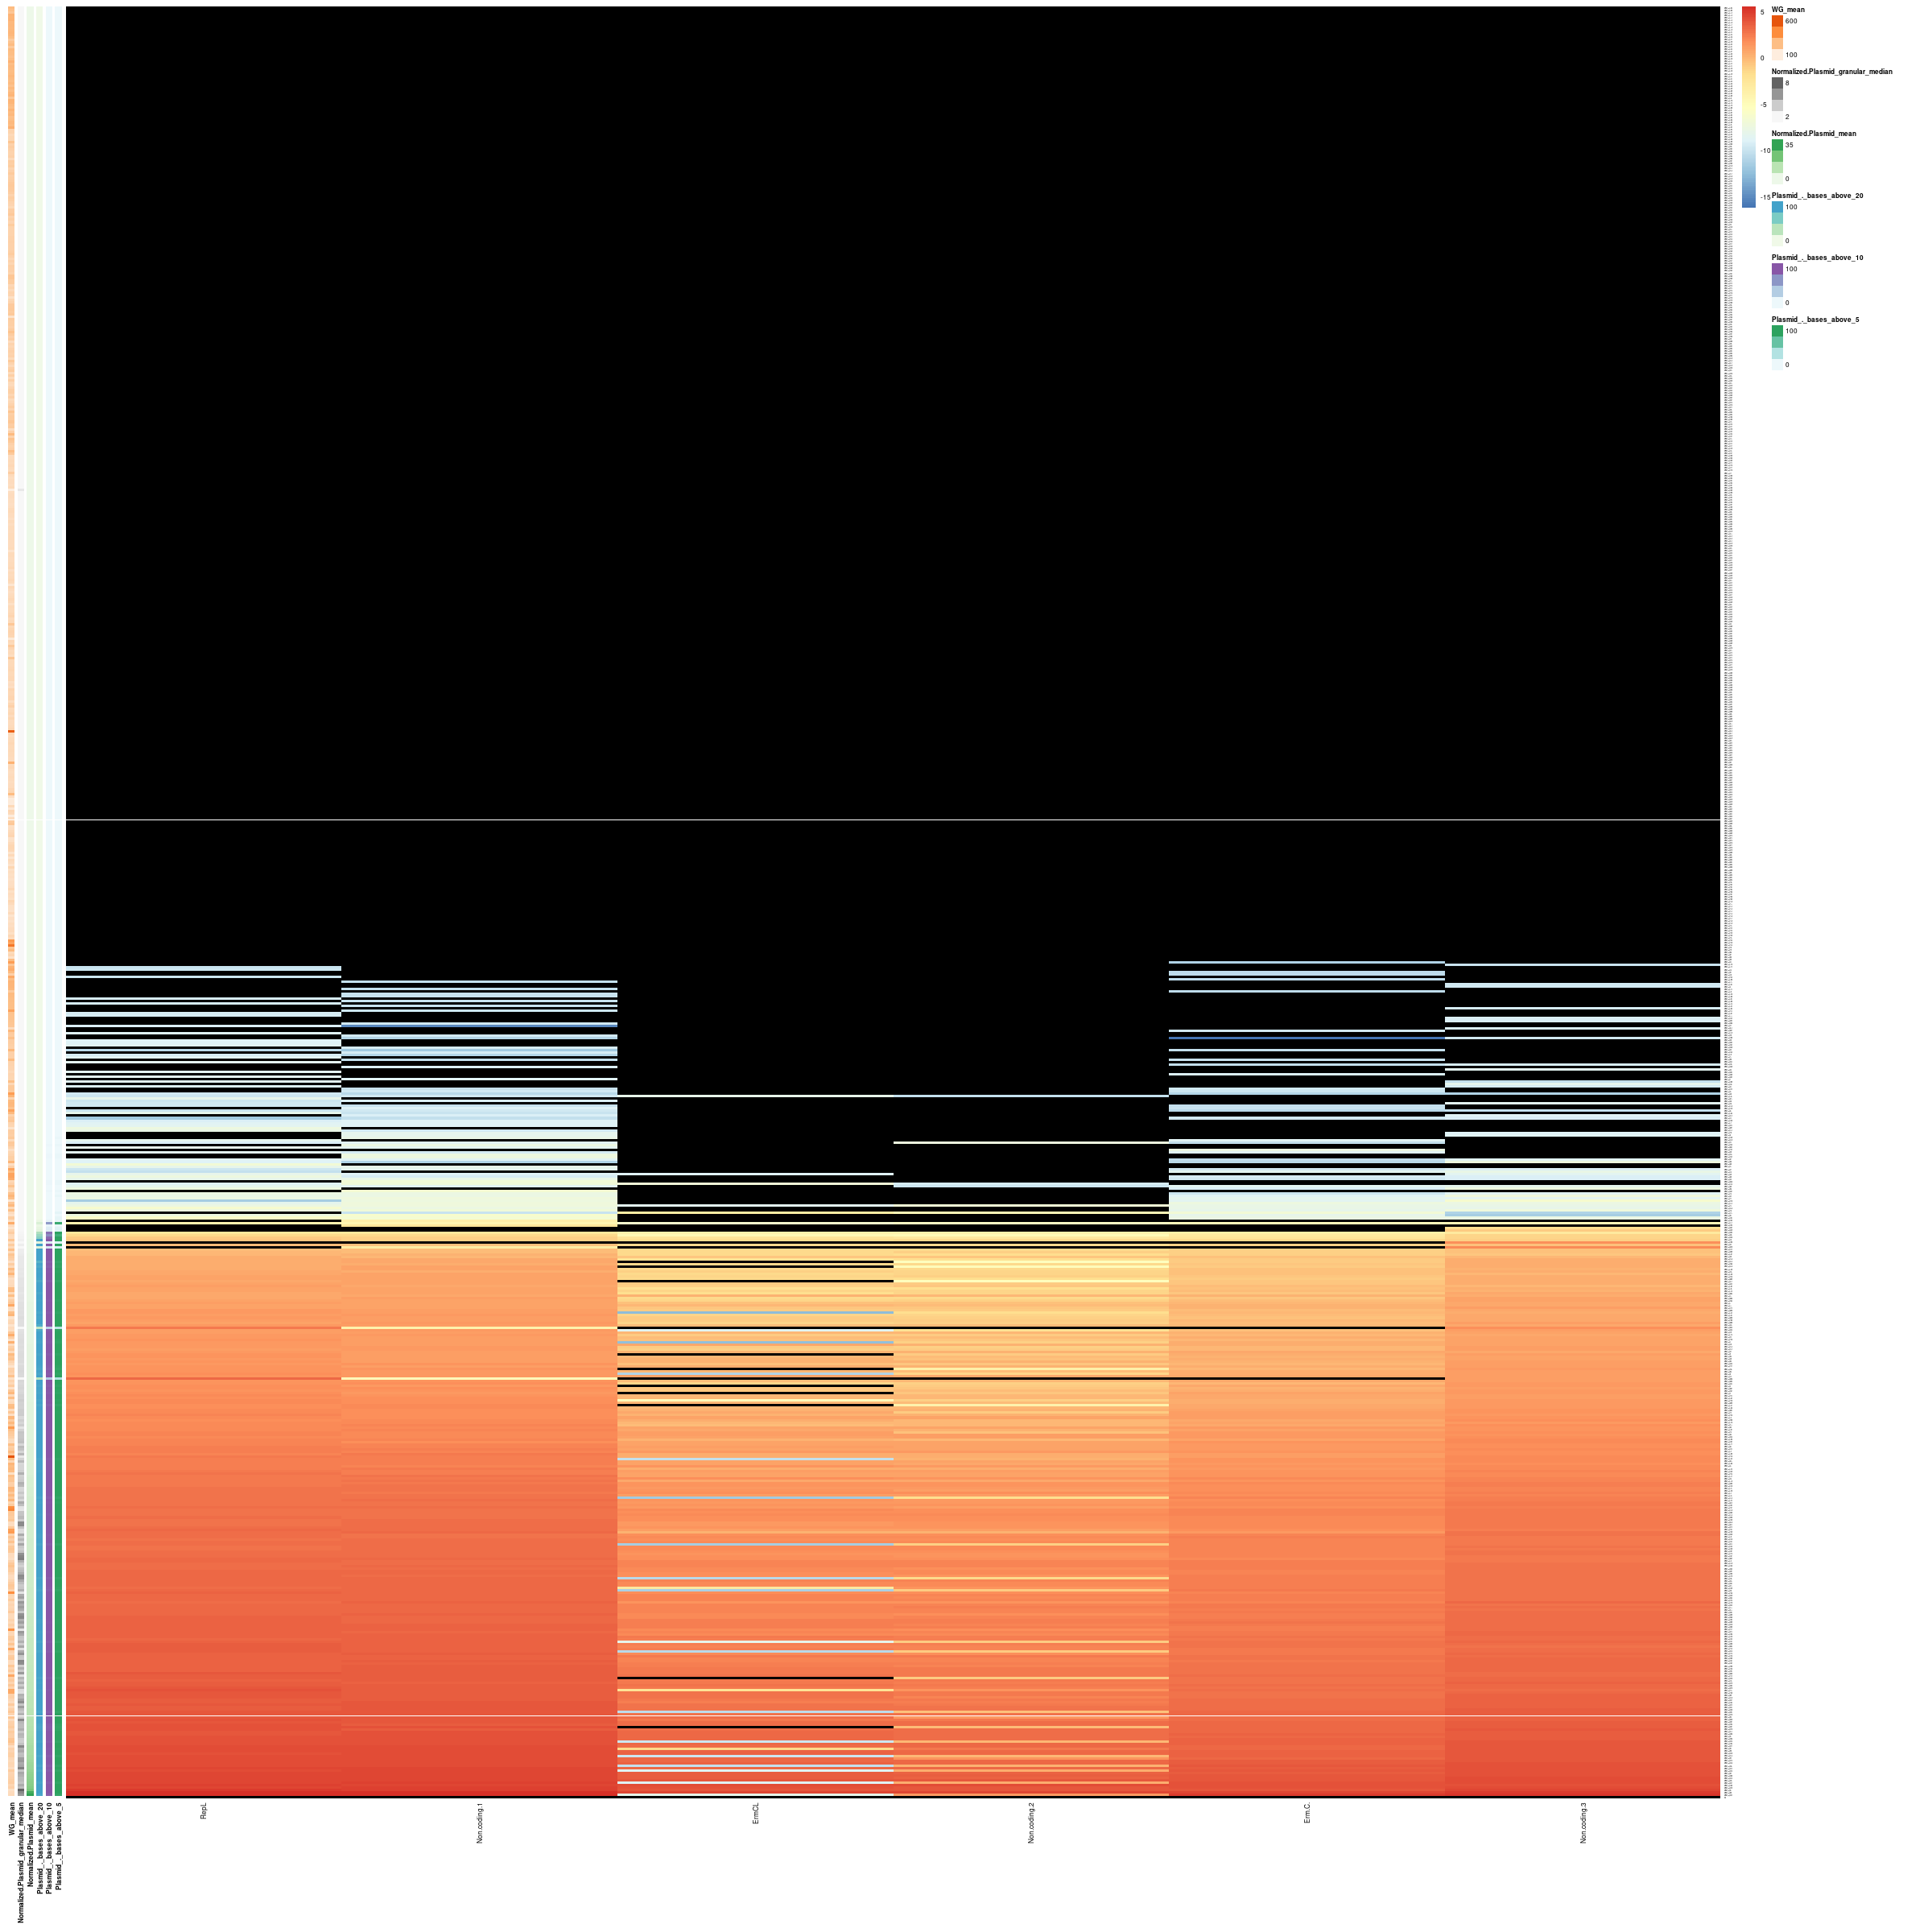

In [4]:
options(repr.plot.width = 20, repr.plot.height = 20)

# Read in the DepthofCoverage Metadata
MRSA_Jail_DepthofCoverage_metadata <- read.csv('Project_MRSA_Jail_depth_of_coverage_metadata_uniq.csv', row.names = 1)

MRSA_jail_Norm_Mean_Gene_DepthofCoverage <- read.csv('Project_MRSA_jail_USA300_SUR4_Normalized_Mean_Gene_Depth.csv', row.names = 1)

#Assign rownames to the Gene Read Depth dataframes

MRSA_jail_Norm_Mean_Gene_DepthofCoverage$Samples <- rownames(MRSA_jail_Norm_Mean_Gene_DepthofCoverage)

# Drop NEG CONTRL Samples from the dataframe

MRSA_jail_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL <- MRSA_jail_Norm_Mean_Gene_DepthofCoverage


# Drop Outlier Sample MRSA_CM_1385 from the dataframe

#MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier <- MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL[-which(grepl("MRSA_CM_1385", MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL$Samples)),]
MRSA_jail_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier <- MRSA_jail_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL

# Drop usused column Samples

MRSA_jail_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column <- subset(MRSA_jail_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier, select = -c(Samples) )


#colnames(MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier) <- c("RepL", "Non-coding 1", "ErmCL", "Non-coding 2", "Erm(C)", "Non-coding 3")


#annotation_row <- MRSA_RO1_DepthofCoverage_metadata[ , c("Plasmid_._bases_above_20", "Normalized.Plasmid_mean", "Normalized.Plasmid_granular_median", "WG_mean")]

# Extract Annotation rows from Depth of Coverage Metadata
annotation_row <- MRSA_Jail_DepthofCoverage_metadata[ , c("Plasmid_._bases_above_5", "Plasmid_._bases_above_10", "Plasmid_._bases_above_20", "Normalized.Plasmid_mean", "Normalized.Plasmid_granular_median", "WG_mean")]

# Assign rownames
annotation_row$Samples <- rownames(annotation_row)

# Drop NEG CTRL samples
annotation_row_exclude_NEG_CTRL <- annotation_row

# Drop outlier sample MRSA_CM_1385
annotation_row_exclude_NEG_CTRL_drop_outlier <- annotation_row_exclude_NEG_CTRL

# Sort row Annotations by Normalized.Plasmid_mean
annotation_row_exclude_NEG_CTRL_drop_outlier_sorted <- annotation_row_exclude_NEG_CTRL_drop_outlier[order(annotation_row_exclude_NEG_CTRL_drop_outlier$Normalized.Plasmid_mean),]

# Drop the unused Samples column
annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column_sorted <- subset(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted, select = -c(Samples) )

#colnames(annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column) <- c("%Basesabove20", "Norm.PlasmidMean", "Norm.PlasmidMedian", "WG_mean")

# Rename column names
colnames(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted) <- c("%Basesabove5", "%Basesabove10", "%Basesabove20", "Norm.PlasmidMean", "Norm.PlasmidMedian", "WG_mean")

#pheatmap(MRSA_RO1_Gene_DepthofCoverage, annotation_row = annotation_row, cluster_cols =  FALSE, angle_col = 45, fontsize_row=1, border_color=NA, fontsize = 5)

#MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[order(row.names(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted)), ]

#MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[order(row.names(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted)), ]


MRSA_jail_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_jail_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[match(rownames(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted), rownames(MRSA_jail_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column)), ]


MRSA_jail_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log <- log2(MRSA_jail_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered)

is.na(MRSA_jail_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log) <- sapply(MRSA_jail_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log, is.infinite)

# pdf(file = "MRSA_jail_Normalized_mean_Gene_DepthofCoverage.pdf",   # The directory you want to save the file in
#     width = 12, # The width of the plot in inches
#     height = 12) 
    
# pheatmap(MRSA_jail_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered, annotation_row = annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column_sorted, cluster_cols =  FALSE, cluster_rows =  FALSE, angle_col = 90, fontsize_row=1, border_color=NA, fontsize = 5)

# dev.off()

# pdf(file = "MRSA_Jail_Normalized_mean_Gene_DepthofCoverage_log.pdf",   # The directory you want to save the file in
#     width = 12, # The width of the plot in inches
#     height = 12) 

pheatmap(MRSA_jail_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log, annotation_row = annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column_sorted, cluster_cols =  FALSE, cluster_rows =  FALSE, angle_col = 90, fontsize_row=1, border_color=NA, fontsize = 5, na_col = "black")

# dev.off()

### Explore Horizontal Plasmid Coverage distribution 

In [1]:
# Import Libraries and set path
import numpy as np
import pandas as pd
from IPython.display import HTML
import os
import readline
import argparse
from itertools import islice
import subprocess
import matplotlib.pyplot as plt

# Set this option for pandas to print data
pd.set_option("display.max_rows", None, "display.max_columns", None)

os.chdir("/nfs/turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection")

In [2]:
Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage = pd.read_csv("2019_Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage.sample_summary.tsv", sep=',', header=0, dtype = str)

Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage = pd.read_csv("2019_Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.sample_summary.tsv", sep=',', header=0, dtype = str)

# Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.rename(columns={"mean": "WG Mean Read Depth"})
# Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage.rename(columns={"mean": "Plasmid Mean Read Depth"})

Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage = Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.add_prefix('WG_')
Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage = Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage.add_prefix('Plasmid_')
Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage = Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.rename(columns={"WG_sample_id": "sample_id"})
Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage = Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage.rename(columns={"Plasmid_sample_id": "sample_id"})

Project_BAA_MRSA_CO_HA_depth_of_coverage = pd.merge(Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage, Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage, on=["sample_id", "sample_id"])
Project_BAA_MRSA_CO_HA_depth_of_coverage = Project_BAA_MRSA_CO_HA_depth_of_coverage.replace(['_R1_001.fastq.gz'], '', regex=True)

Project_BAA_MRSA_CO_HA_depth_of_coverage['WG_mean'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['WG_mean'].astype(float)
Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_mean'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_mean'].astype(float)
Project_BAA_MRSA_CO_HA_depth_of_coverage['WG_granular_median'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['WG_granular_median'].astype(float)
Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_granular_median'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_granular_median'].astype(float)
Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_1'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_1'].astype(float)
Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_5'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_5'].astype(float)
Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_10'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_10'].astype(float)
Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_15'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_15'].astype(float)

Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_20'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_20'].astype(float)
Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_25'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_%_bases_above_25'].astype(float)

# Project_BAA_MRSA_CO_HA_depth_of_coverage.columns

Project_BAA_MRSA_CO_HA_depth_of_coverage['Normalized Plasmid_mean'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_mean'] / Project_BAA_MRSA_CO_HA_depth_of_coverage['WG_mean']
Project_BAA_MRSA_CO_HA_depth_of_coverage['Normalized Plasmid_granular_median'] = Project_BAA_MRSA_CO_HA_depth_of_coverage['Plasmid_granular_median'] / Project_BAA_MRSA_CO_HA_depth_of_coverage['WG_granular_median']
Project_BAA_MRSA_CO_HA_depth_of_coverage.to_csv('Project_BAA_MRSA_CO_HA_depth_of_coverage_metadata.csv', index=False)

In [3]:
MRSA_RO1_SUR4_Plasmid_depth_of_coverage = pd.read_csv("MRSA_RO1_SUR4_Plasmid_depth_of_coverage.sample_summary.tsv", sep=',', header=0, dtype = str)

MRSA_RO1_USA300_depth_of_coverage = pd.read_csv("MRSA_RO1_USA300_depth_of_coverage.sample_summary.tsv", sep='\t', header=0, dtype = str)

# Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.rename(columns={"mean": "WG Mean Read Depth"})
# Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage.rename(columns={"mean": "Plasmid Mean Read Depth"})

MRSA_RO1_USA300_depth_of_coverage = MRSA_RO1_USA300_depth_of_coverage.add_prefix('WG_')
MRSA_RO1_SUR4_Plasmid_depth_of_coverage = MRSA_RO1_SUR4_Plasmid_depth_of_coverage.add_prefix('Plasmid_')
MRSA_RO1_USA300_depth_of_coverage = MRSA_RO1_USA300_depth_of_coverage.rename(columns={"WG_sample_id": "sample_id"})
MRSA_RO1_SUR4_Plasmid_depth_of_coverage = MRSA_RO1_SUR4_Plasmid_depth_of_coverage.rename(columns={"Plasmid_sample_id": "sample_id"})

MRSA_RO1_depth_of_coverage = pd.merge(MRSA_RO1_USA300_depth_of_coverage, MRSA_RO1_SUR4_Plasmid_depth_of_coverage, on=["sample_id", "sample_id"])
MRSA_RO1_depth_of_coverage = MRSA_RO1_depth_of_coverage.replace(['_R1.fastq.gz'], '', regex=True)

MRSA_RO1_depth_of_coverage['WG_mean'] = MRSA_RO1_depth_of_coverage['WG_mean'].astype(float)
MRSA_RO1_depth_of_coverage['Plasmid_mean'] = MRSA_RO1_depth_of_coverage['Plasmid_mean'].astype(float)
MRSA_RO1_depth_of_coverage['WG_granular_median'] = MRSA_RO1_depth_of_coverage['WG_granular_median'].astype(float)
MRSA_RO1_depth_of_coverage['Plasmid_granular_median'] = MRSA_RO1_depth_of_coverage['Plasmid_granular_median'].astype(float)
MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_1'] = MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_1'].astype(float)
MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_5'] = MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_5'].astype(float)
MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_10'] = MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_10'].astype(float)
MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_15'] = MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_15'].astype(float)
MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_20'] = MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_20'].astype(float)
MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_25'] = MRSA_RO1_depth_of_coverage['Plasmid_%_bases_above_25'].astype(float)
MRSA_RO1_depth_of_coverage['Normalized Plasmid_mean'] = MRSA_RO1_depth_of_coverage['Plasmid_mean'] / MRSA_RO1_depth_of_coverage['WG_mean']

MRSA_RO1_depth_of_coverage['Normalized Plasmid_granular_median'] = MRSA_RO1_depth_of_coverage['Plasmid_granular_median'] / MRSA_RO1_depth_of_coverage['WG_granular_median']
MRSA_RO1_depth_of_coverage.to_csv('Project_MRSA_RO1_depth_of_coverage_metadata.csv', index=False)
#MRSA_RO1_depth_of_coverage.columns

In [4]:
MRSA_jail_SUR4_Plasmid_depth_of_coverage = pd.read_csv("MRSA_Jail_SUR4_Plasmid_depth_of_coverage.sample_summary.tsv", sep='\t', header=0, dtype = str)

MRSA_jail_USA300_depth_of_coverage = pd.read_csv("MRSA_Jail_USA300_depth_of_coverage.sample_summary.tsv", sep=',', header=0, dtype = str)

# Project_BAA_MRSA_CO_HA_USA300_depth_of_coverage.rename(columns={"mean": "WG Mean Read Depth"})
# Project_BAA_MRSA_CO_HA_SUR4_Plasmid_depth_of_coverage.rename(columns={"mean": "Plasmid Mean Read Depth"})

MRSA_jail_USA300_depth_of_coverage = MRSA_jail_USA300_depth_of_coverage.add_prefix('WG_')
MRSA_jail_SUR4_Plasmid_depth_of_coverage = MRSA_jail_SUR4_Plasmid_depth_of_coverage.add_prefix('Plasmid_')
MRSA_jail_USA300_depth_of_coverage = MRSA_jail_USA300_depth_of_coverage.rename(columns={"WG_sample_id": "sample_id"})
MRSA_jail_SUR4_Plasmid_depth_of_coverage = MRSA_jail_SUR4_Plasmid_depth_of_coverage.rename(columns={"Plasmid_sample_id": "sample_id"})

MRSA_jail_depth_of_coverage = pd.merge(MRSA_jail_USA300_depth_of_coverage, MRSA_jail_SUR4_Plasmid_depth_of_coverage, on=["sample_id", "sample_id"])
MRSA_jail_depth_of_coverage = MRSA_jail_depth_of_coverage.replace(['_R1.fastq.gz'], '', regex=True)

MRSA_jail_depth_of_coverage['WG_mean'] = MRSA_jail_depth_of_coverage['WG_mean'].astype(float)
MRSA_jail_depth_of_coverage['Plasmid_mean'] = MRSA_jail_depth_of_coverage['Plasmid_mean'].astype(float)
MRSA_jail_depth_of_coverage['WG_granular_median'] = MRSA_jail_depth_of_coverage['WG_granular_median'].astype(float)
MRSA_jail_depth_of_coverage['Plasmid_granular_median'] = MRSA_jail_depth_of_coverage['Plasmid_granular_median'].astype(float)
MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_1'] = MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_1'].astype(float)
MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_5'] = MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_5'].astype(float)
MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_10'] = MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_10'].astype(float)
MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_15'] = MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_15'].astype(float)
MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_20'] = MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_20'].astype(float)
MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_25'] = MRSA_jail_depth_of_coverage['Plasmid_%_bases_above_25'].astype(float)
# MRSA_jail_depth_of_coverage.columns

MRSA_jail_depth_of_coverage['Normalized Plasmid_mean'] = MRSA_jail_depth_of_coverage['Plasmid_mean'] / MRSA_jail_depth_of_coverage['WG_mean']

MRSA_jail_depth_of_coverage['Normalized Plasmid_granular_median'] = MRSA_jail_depth_of_coverage['Plasmid_granular_median'] / MRSA_jail_depth_of_coverage['WG_granular_median']


MRSA_jail_depth_of_coverage.to_csv('Project_MRSA_Jail_depth_of_coverage_metadata.csv', index=False)

In [5]:
Project_BAA_MRSA_CO_HA_depth_of_coverage["Project"] = "MRSA BAA CO-HA"
MRSA_RO1_depth_of_coverage["Project"] = "MRSA Modeling RO1"
MRSA_jail_depth_of_coverage["Project"] = "MRSA Jail"

In [6]:
All_df = pd.concat([Project_BAA_MRSA_CO_HA_depth_of_coverage, MRSA_RO1_depth_of_coverage, MRSA_jail_depth_of_coverage], axis=0)

In [7]:
len(All_df)

4953

In [8]:
All_df['Normalized Plasmid_mean'].max()

124.49159745026077

In [9]:
#All_df['Normalized Plasmid_mean'] == 0
len(All_df[All_df["Normalized Plasmid_mean"]==0])

1450

In [10]:
len(All_df[All_df["Normalized Plasmid_mean"]!=0])

3503

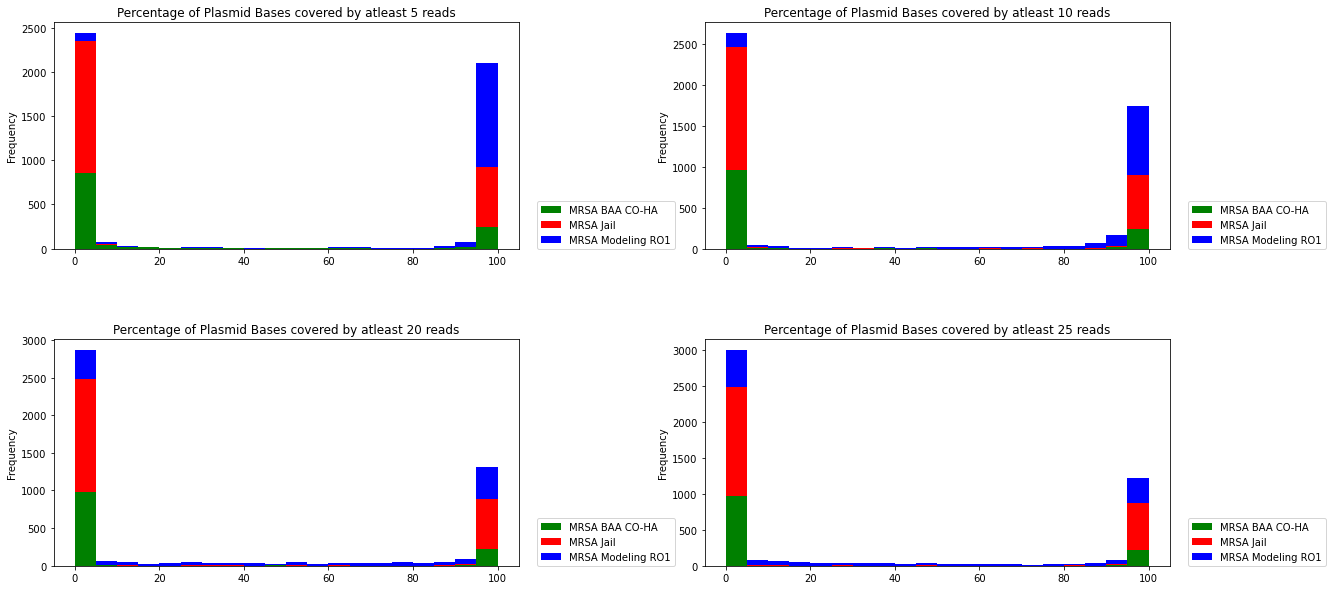

In [46]:
plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
# fig, ax = plt.subplots(figsize=(20, 10))
All_df.pivot(columns='Project', values='Plasmid_%_bases_above_5').plot.hist(bins = 20, ax=ax, stacked=True, color=['green','red','blue'])
plt.legend(loc=(1.04,0), title='Project', ncol=2)
#plt.axvline(x=0.9999, color='b', linestyle='--', label='Secondary Cluster ANI threshold')
plt.legend(loc=(1.04,0))
plt.title("Percentage of Plasmid Bases covered by atleast 5 reads")
# plt.show()

ax = fig.add_subplot(2, 2, 2)
# fig, ax = plt.subplots(figsize=(20, 10))
All_df.pivot(columns='Project', values='Plasmid_%_bases_above_10').plot.hist(bins = 20, ax=ax, stacked=True, color=['green','red','blue'])
plt.legend(loc=(1.04,0), title='Project', ncol=2)
#plt.axvline(x=0.9999, color='b', linestyle='--', label='Secondary Cluster ANI threshold')
plt.legend(loc=(1.04,0))
plt.title("Percentage of Plasmid Bases covered by atleast 10 reads")
# plt.show()

ax = fig.add_subplot(2, 2, 3)
# fig, ax = plt.subplots(figsize=(20, 10))
All_df.pivot(columns='Project', values='Plasmid_%_bases_above_20').plot.hist(bins = 20, ax=ax, stacked=True, color=['green','red','blue'])
plt.legend(loc=(1.04,0), title='Project', ncol=2)
#plt.axvline(x=0.9999, color='b', linestyle='--', label='Secondary Cluster ANI threshold')
plt.legend(loc=(1.04,0))
plt.title("Percentage of Plasmid Bases covered by atleast 20 reads")
# plt.show()

ax = fig.add_subplot(2, 2, 4)
# fig, ax = plt.subplots(figsize=(20, 10))
All_df.pivot(columns='Project', values='Plasmid_%_bases_above_25').plot.hist(bins = 20, ax=ax, stacked=True, color=['green','red','blue'])
plt.legend(loc=(1.04,0), title='Project', ncol=2)
#plt.axvline(x=0.9999, color='b', linestyle='--', label='Secondary Cluster ANI threshold')
plt.legend(loc=(1.04,0))
plt.title("Percentage of Plasmid Bases covered by atleast 25 reads")
plt.show()

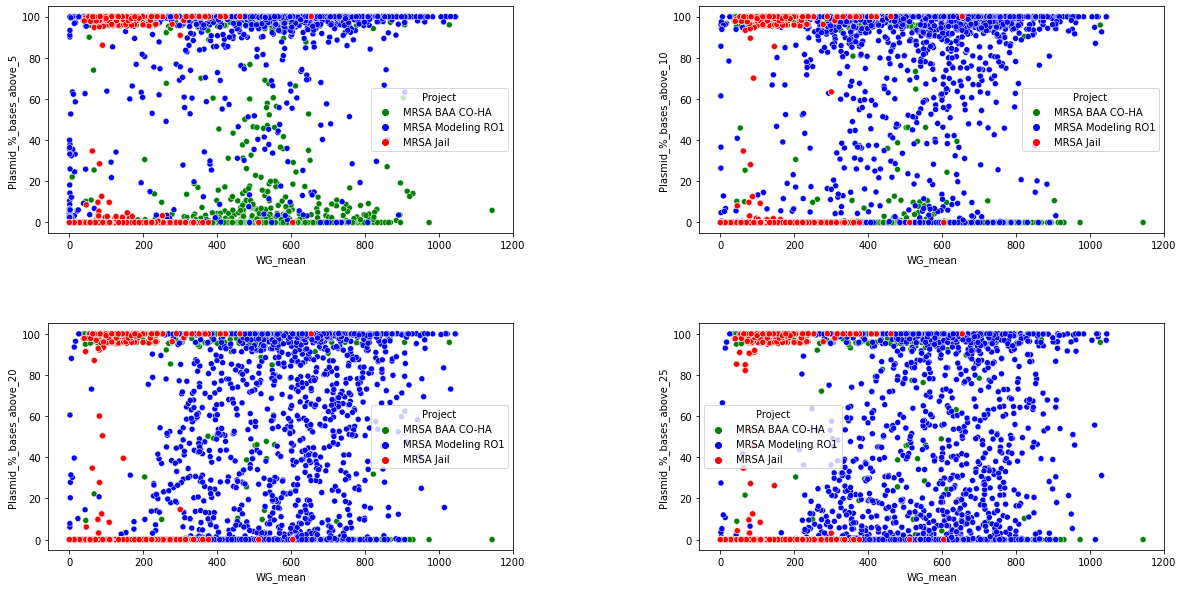

In [47]:
plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [17, 10]
sns.scatterplot(data=All_df, x='WG_mean', y='Plasmid_%_bases_above_5', hue='Project', ax=ax, palette=['green','blue','red'])

ax = fig.add_subplot(2, 2, 2)
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [17, 10]
sns.scatterplot(data=All_df, x='WG_mean', y='Plasmid_%_bases_above_10', hue='Project', ax=ax, palette=['green','blue','red'])

ax = fig.add_subplot(2, 2, 3)
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [17, 10]
sns.scatterplot(data=All_df, x='WG_mean', y='Plasmid_%_bases_above_20', hue='Project', ax=ax, palette=['green','blue','red'])

ax = fig.add_subplot(2, 2, 4)
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [17, 10]
sns.scatterplot(data=All_df, x='WG_mean', y='Plasmid_%_bases_above_25', hue='Project', ax=ax, palette=['green','blue','red'])

plt.show()

In [192]:
#All_df[All_df['Plasmid_%_bases_above_25'] > 50 & All_df['Plasmid_%_bases_above_25'] < 70]
#All_df.loc[All_df['Plasmid_%_bases_above_25'] > 20]
len(All_df[(All_df['Plasmid_%_bases_above_10'] > 20) & (All_df['Plasmid_%_bases_above_10'] < 70)])

171

In [193]:
len(All_df[(All_df['Plasmid_%_bases_above_10'] > 20) & (All_df['Plasmid_%_bases_above_10'] < 70) & (All_df['Project'] == 'MRSA Modeling RO1')])

147

In [ ]:
All_df[(All_df['Plasmid_%_bases_above_5'] > 20) & (All_df['Plasmid_%_bases_above_5'] < 70) & (All_df['Project'] == 'MRSA Modeling RO1')]

In [ ]:
# fig, ax = plt.subplots(figsize=(20, 10))
# All_df.pivot(columns='Project', values='Plasmid_mean').plot.hist(bins = 50, ax=ax, stacked=True, color=['green','red','blue'])
# plt.legend(loc=(1.04,0), title='Project', ncol=2)
# #plt.axvline(x=0.9999, color='b', linestyle='--', label='Secondary Cluster ANI threshold')
# plt.legend(loc=(1.04,0))
# plt.title("Distribution of Plasmid Mean Read Depth")
# plt.show()

# fig, ax = plt.subplots(figsize=(20, 10))
# All_df.pivot(columns='Project', values='Normalized Plasmid_mean').plot.hist(bins = 50, ax=ax, range=[0, 25], stacked=True, color=['green','red','blue'])
# plt.legend(loc=(1.04,0), title='Project', ncol=2)
# #plt.axvline(x=0.9999, color='b', linestyle='--', label='Secondary Cluster ANI threshold')
# plt.legend(loc=(1.04,0))
# plt.title("Distribution of Plasmid Mean Depth normalized by Whole Genome Read Depth")
# plt.show()

In [29]:
# #no_1 = All_df.pivot(index="Project", columns="Plasmid_%_bases_above_5", values="Plasmid_%_bases_above_5")
# concat = All_df.pivot(columns='Project', values='Plasmid_%_bases_above_5')
# All_df_above_5["Data"] = "Plasmid_%_bases_above_5"
# All_df_above_10 = All_df.pivot(columns='Project', values='Plasmid_%_bases_above_10')
# All_df_above_10["Data"] = "Plasmid_%_bases_above_10"
# All_df_above_20 = All_df.pivot(columns='Project', values='Plasmid_%_bases_above_20')
# All_df_above_20["Data"] = "Plasmid_%_bases_above_20"
# All_df_above_25 = All_df.pivot(columns='Project', values='Plasmid_%_bases_above_25')
# All_df_above_25["Data"] = "Plasmid_%_bases_above_25"

In [30]:
All_df_above = pd.concat([All_df_above_5, All_df_above_10, All_df_above_20, All_df_above_25], axis=0)

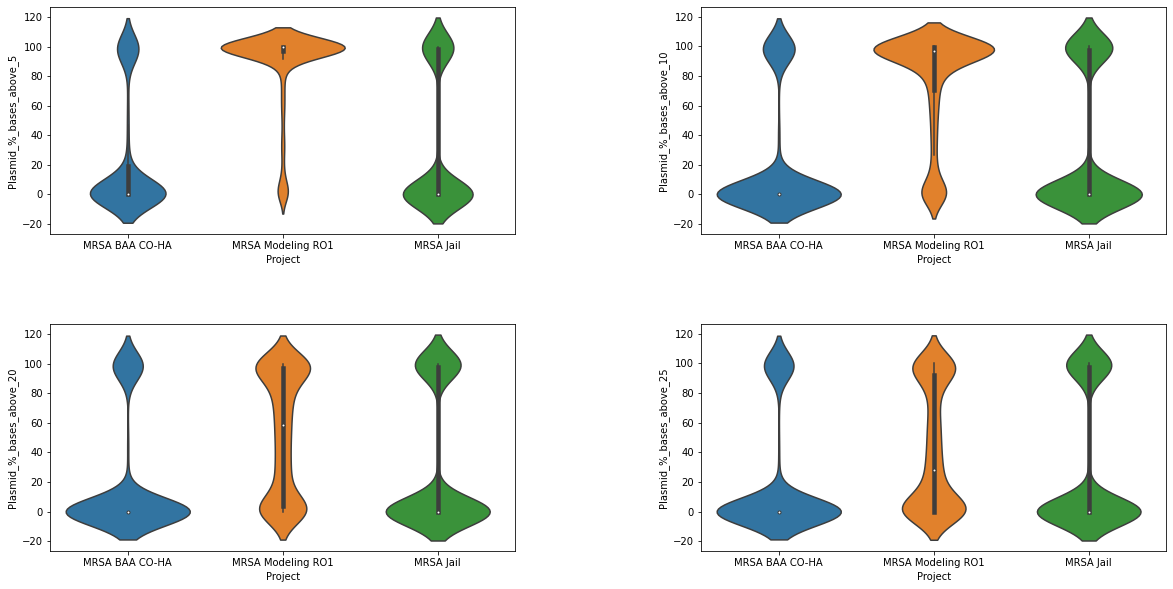

In [48]:
plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.violinplot(data=All_df, x="Project", y="Plasmid_%_bases_above_5", ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.violinplot(data=All_df, x="Project", y="Plasmid_%_bases_above_10", ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.violinplot(data=All_df, x="Project", y="Plasmid_%_bases_above_20",ax=ax)
ax = fig.add_subplot(2, 2, 4)
sns.violinplot(data=All_df, x="Project", y="Plasmid_%_bases_above_25", ax=ax)
plt.show()

### Overlay Antibiotic Resistance data on RO1 Plasmid Depth  

In [2]:
MRSA_RO1_USA300_depth_of_coverage_metadata = pd.read_csv("Project_MRSA_RO1_depth_of_coverage_metadata.csv", sep=',', header=0, dtype = str)

MRSA_RO1_USA300_sample_lookup = pd.read_csv("2021-09-14_MRSA_modeling_genome_sample_lookup.txt", sep='\t', header=0, dtype = str)

MRSA_RO1_Clinda_resistance = pd.read_csv("Clindamycin_Data_2018-2020.csv", sep='\t', header=0, dtype = str)

MRSA_RO1_USA300_sample_lookup.rename(columns = {'Genome ID':'sample_id'}, inplace = True)

MRSA_RO1_Clinda_resistance.rename(columns = {'Cd':'Clinda.Resistance'}, inplace = True)
MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup = pd.merge(MRSA_RO1_USA300_depth_of_coverage_metadata, MRSA_RO1_USA300_sample_lookup, on=["sample_id", "sample_id"], how='left')

In [3]:
MRSA_RO1_Clinda_resistance.head()

,FreezerNum,Clinda.Resistance
0,8815,S
1,8816,S
2,8817,R
3,8818,S
4,8819,R


In [4]:
MRSA_RO1_Clinda_resistance.rename(columns = {'FreezerNum':'Sample ID'}, inplace = True)

MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance = pd.merge(MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup, MRSA_RO1_Clinda_resistance, on=["Sample ID", "Sample ID"], how="left")

Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth = pd.read_csv("Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth.csv", sep=',', header=0, dtype = str)

#MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance.to_csv('Project_MRSA_RO1_depth_of_coverage_metadata_with_lookup_and_resistance.csv', index=False)

In [15]:
MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance = MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance.fillna("NA")

MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples = MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance.loc[MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance['Clinda.Resistance'] == "R"]

MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples = MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance.loc[MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance['Clinda.Resistance'] == "S"]

In [17]:
MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples.to_csv('Project_MRSA_RO1_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples.csv', index=False)
MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples.to_csv('Project_MRSA_RO1_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples.csv', index=False)

In [25]:
MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance.to_csv('Project_MRSA_RO1_depth_of_coverage_metadata_with_lookup_and_resistance.csv', index=False)

Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth = pd.read_csv("Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth.csv", sep=',', header=0, dtype = str)

Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples = Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth[Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth['sample_id'].isin(MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples['sample_id'])]

Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth_susceptible_samples = Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth[Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth['sample_id'].isin(MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples['sample_id'])]

In [26]:
Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples.to_csv('Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples.csv', index=False)
Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth_susceptible_samples.to_csv('Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth_susceptible_samples.csv', index=False)

In [ ]:
setwd("/nfs//turbo/umms-esnitkin/Project_MRSA/Analysis/2021_modeling_R01/2023-01-15-USA300_SUR4_Plasmid_Detection")

# {r}
# Load the packages
cran_packages <- c("BiocManager","phytools","ggplot2","tidyverse","readxl","randomcoloR","cowplot","printr")
# BiocManager packages
BiocManager_packages <- c("ggtree","ggnewscale")
lapply(cran_packages,library,character.only=T)
lapply(BiocManager_packages,library,character.only=T)
library(treeio)
library(pheatmap)
library(RColorBrewer)
options(repr.plot.width = 20, repr.plot.height = 20)

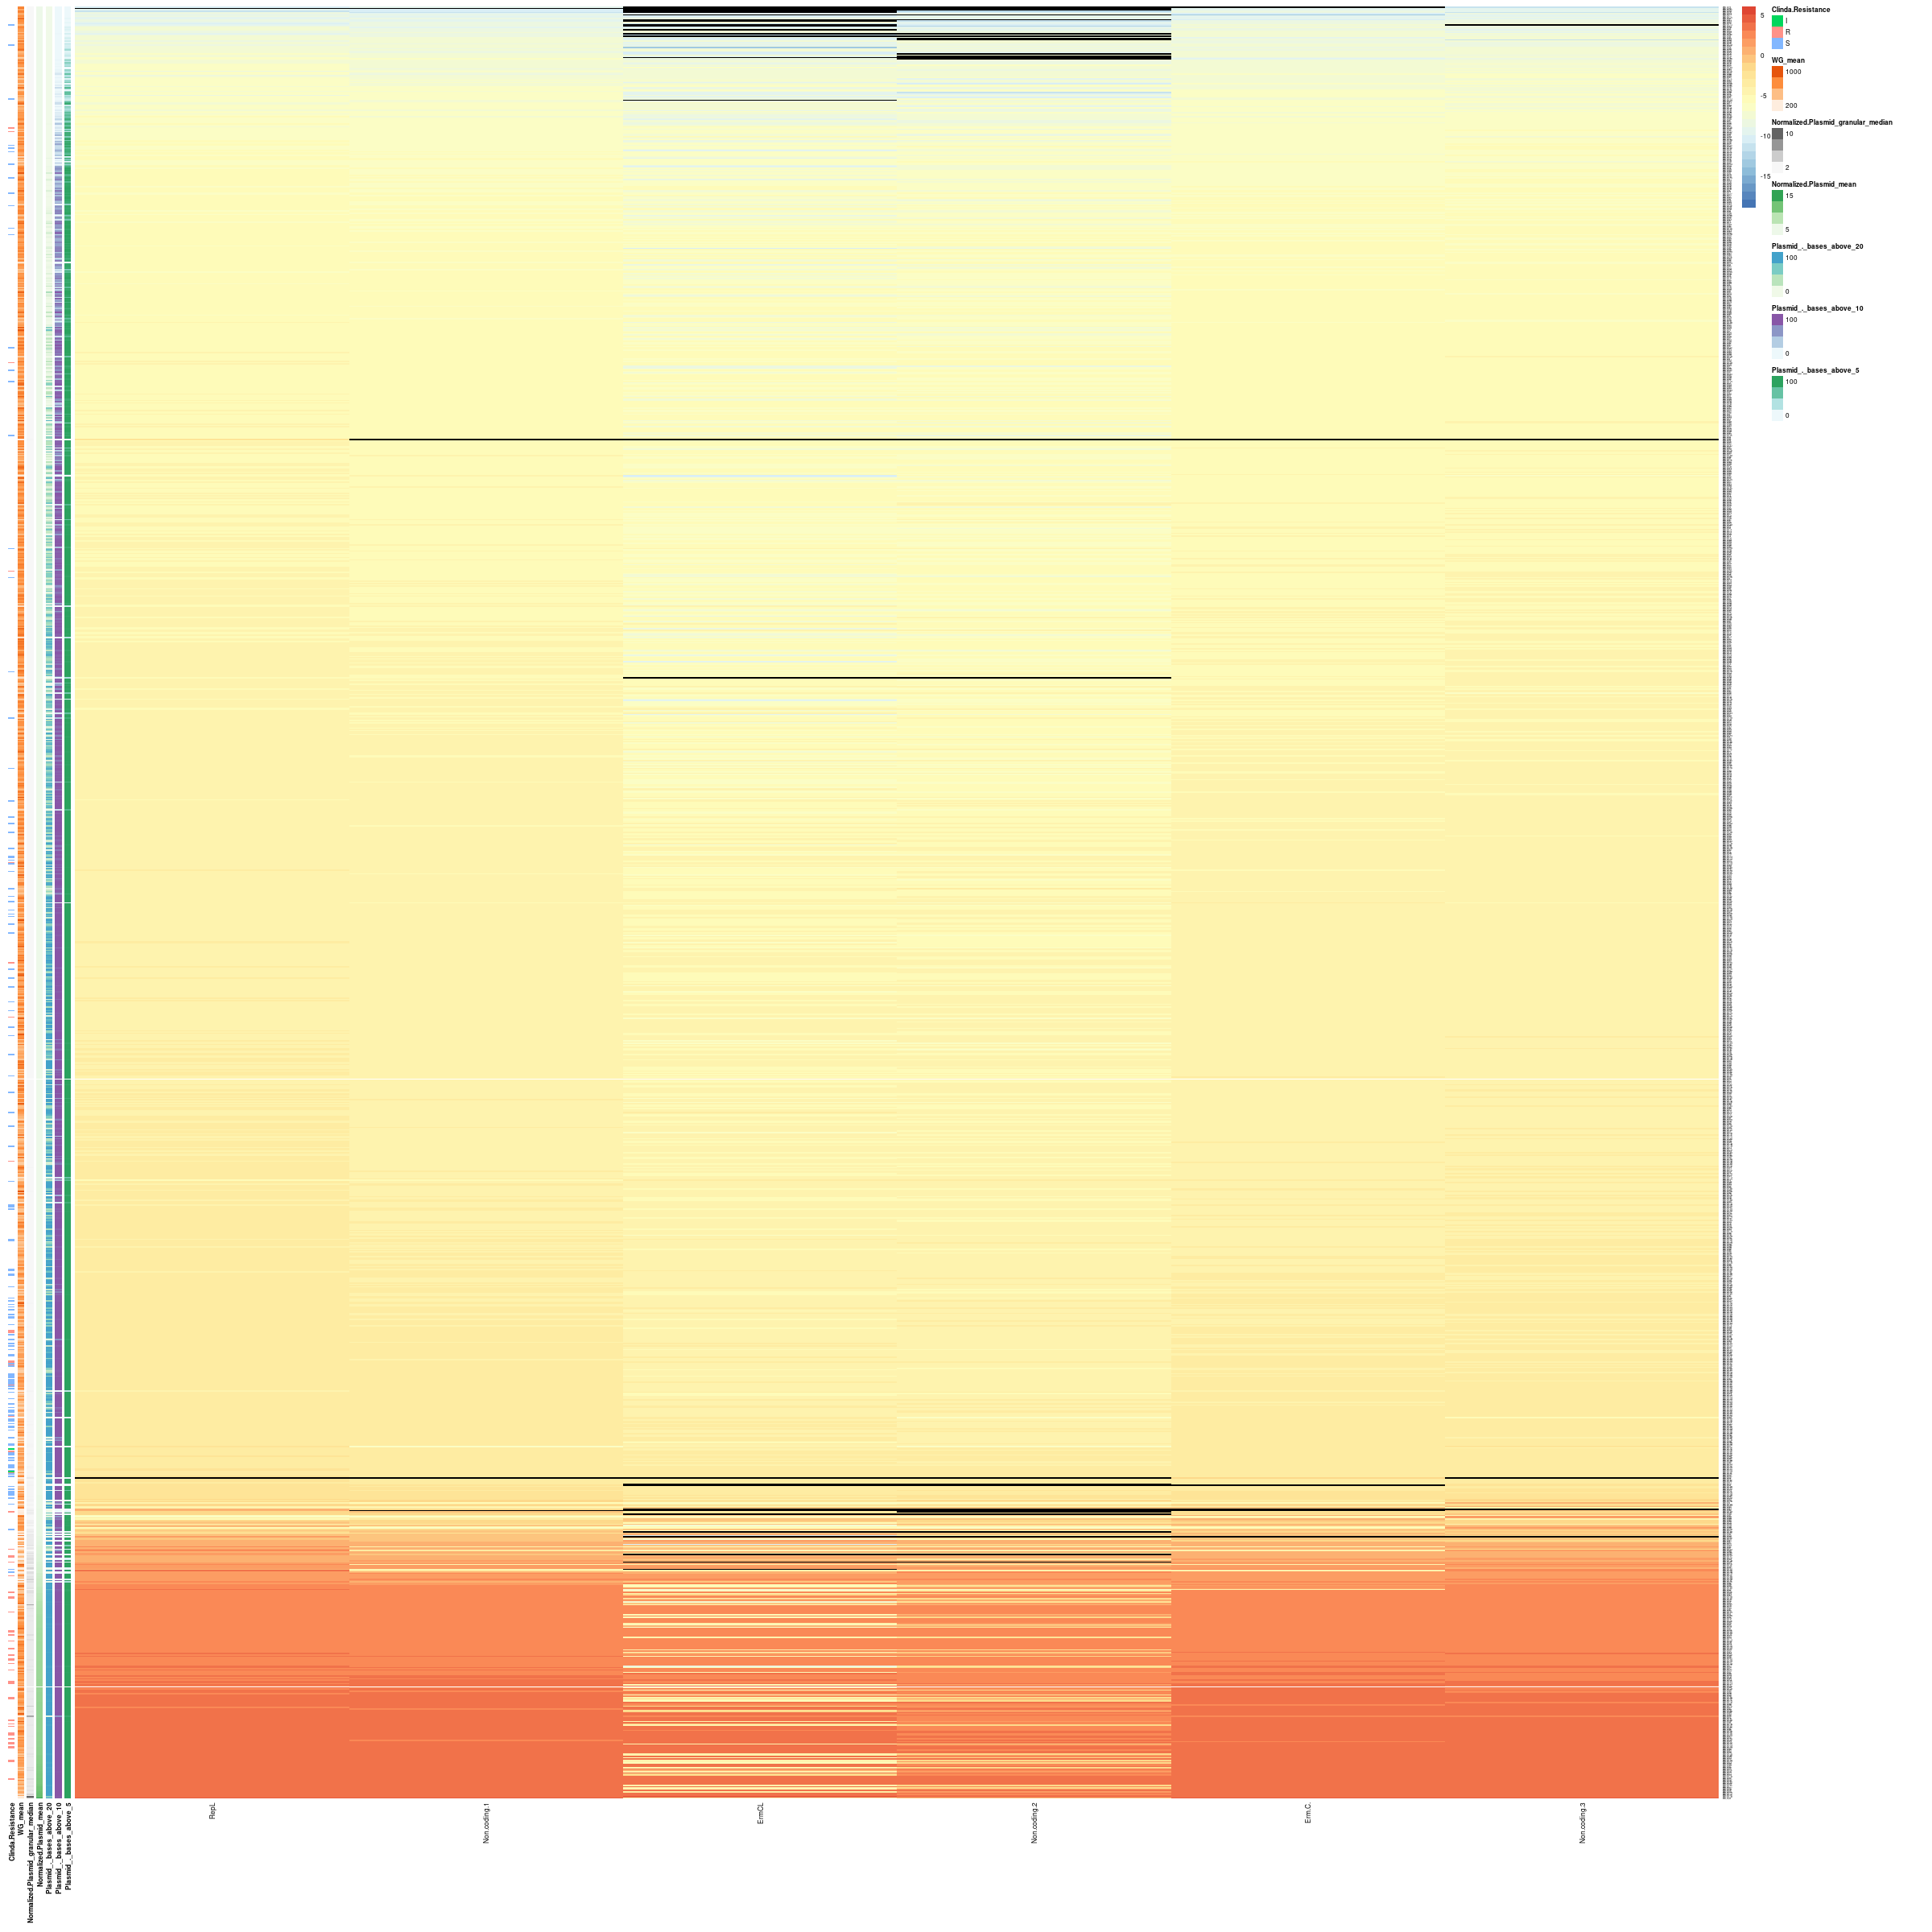

In [2]:
# Read in DepthofCoverage Metadata and Gene Read Depth
MRSA_RO1_DepthofCoverage_metadata <- read.csv('Project_MRSA_RO1_depth_of_coverage_metadata.csv', row.names = 1)
MRSA_RO1_DepthofCoverage_metadata_with_resistance <- read.csv('Project_MRSA_RO1_depth_of_coverage_metadata_with_lookup_and_resistance.csv', row.names = 1)

MRSA_RO1_Gene_DepthofCoverage <- read.csv('Project_MRSA_RO1_USA300_SUR4_Gene_Depth.csv', row.names = 1)
MRSA_RO1_Norm_Mean_Gene_DepthofCoverage <- read.csv('Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth.csv', row.names = 1)


#Assign rownames to the Gene Read Depth dataframes
MRSA_RO1_Gene_DepthofCoverage$Samples <- rownames(MRSA_RO1_Gene_DepthofCoverage)
MRSA_RO1_Norm_Mean_Gene_DepthofCoverage$Samples <- rownames(MRSA_RO1_Norm_Mean_Gene_DepthofCoverage)

# Drop NEG CONTRL Samples from the dataframe
MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL <- MRSA_RO1_Gene_DepthofCoverage[-which(grepl("*NEG_CTL*", MRSA_RO1_Gene_DepthofCoverage$Samples)),]
MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL <- MRSA_RO1_Norm_Mean_Gene_DepthofCoverage[-which(grepl("*NEG_CTL*", MRSA_RO1_Norm_Mean_Gene_DepthofCoverage$Samples)),]


# Drop Outlier Sample MRSA_CM_1385 from the dataframe
MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier <- MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL[-which(grepl("MRSA_CM_1385", MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL$Samples)),]
#MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier <- MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL[-which(grepl("MRSA_CM_1385", MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL$Samples)),]
MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier <- MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL

# Drop usused column Samples
MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column <- subset(MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier, select = -c(Samples) )
MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column <- subset(MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier, select = -c(Samples) )


#colnames(MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier) <- c("RepL", "Non-coding 1", "ErmCL", "Non-coding 2", "Erm(C)", "Non-coding 3")


#annotation_row <- MRSA_RO1_DepthofCoverage_metadata[ , c("Plasmid_._bases_above_20", "Normalized.Plasmid_mean", "Normalized.Plasmid_granular_median", "WG_mean")]

# Extract Annotation rows from Depth of Coverage Metadata
annotation_row <- MRSA_RO1_DepthofCoverage_metadata_with_resistance[ , c("Plasmid_._bases_above_5", "Plasmid_._bases_above_10", "Plasmid_._bases_above_20", "Normalized.Plasmid_mean", "Normalized.Plasmid_granular_median", "WG_mean", "Clinda.Resistance")]

# Assign rownames
annotation_row$Samples <- rownames(annotation_row)

# Drop NEG CTRL samples
annotation_row_exclude_NEG_CTRL <- annotation_row[-which(grepl("*NEG_CTL*", annotation_row$Samples)),]

# Drop outlier sample MRSA_CM_1385
annotation_row_exclude_NEG_CTRL_drop_outlier <- annotation_row_exclude_NEG_CTRL[-which(grepl("MRSA_CM_1385", annotation_row_exclude_NEG_CTRL$Samples)),]

# Sort row Annotations by Normalized.Plasmid_mean
annotation_row_exclude_NEG_CTRL_drop_outlier_sorted <- annotation_row_exclude_NEG_CTRL_drop_outlier[order(annotation_row_exclude_NEG_CTRL_drop_outlier$Normalized.Plasmid_mean),]

# Drop the unused Samples column
annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column_sorted <- subset(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted, select = -c(Samples) )

#colnames(annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column) <- c("%Basesabove20", "Norm.PlasmidMean", "Norm.PlasmidMedian", "WG_mean")

# Rename column names
colnames(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted) <- c("%Basesabove5", "%Basesabove10", "%Basesabove20", "Norm.PlasmidMean", "Norm.PlasmidMedian", "WG_mean", "Clinda.Resistance")

#pheatmap(MRSA_RO1_Gene_DepthofCoverage, annotation_row = annotation_row, cluster_cols =  FALSE, angle_col = 45, fontsize_row=1, border_color=NA, fontsize = 5)

#MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[order(row.names(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted)), ]

#MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[order(row.names(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted)), ]

MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[match(rownames(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted), rownames(MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column)), ]
MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[match(rownames(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted), rownames(MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column)), ]


MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log <- log2(MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered)

is.na(MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log) <- sapply(MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log, is.infinite)


#pdf(file = "MRSA_RO1_Normalized_mean_Gene_DepthofCoverage_log.pdf",   # The directory you want to save the file inwidth = 12, # The width of the plot in inchesheight = 12) 

breaksList = seq(-19, 6, by = 1)
pheatmap(MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log, annotation_row = annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column_sorted, cluster_cols =  FALSE, cluster_rows =  FALSE, angle_col = 90, fontsize_row=1, border_color=NA, fontsize = 5, na_col = "black",  breaks = breaksList, color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)))

#dev.off()




#pdf(file = "MRSA_RO1_Normalized_mean_Gene_DepthofCoverage.pdf",   # The directory you want to save the file inwidth = 12, # The width of the plot in inchesheight = 12) 
    
# pheatmap(MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered, annotation_row = annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column_sorted, cluster_cols =  FALSE, cluster_rows =  FALSE, angle_col = 90, fontsize_row=1, border_color=NA, fontsize = 5)

#dev.off()


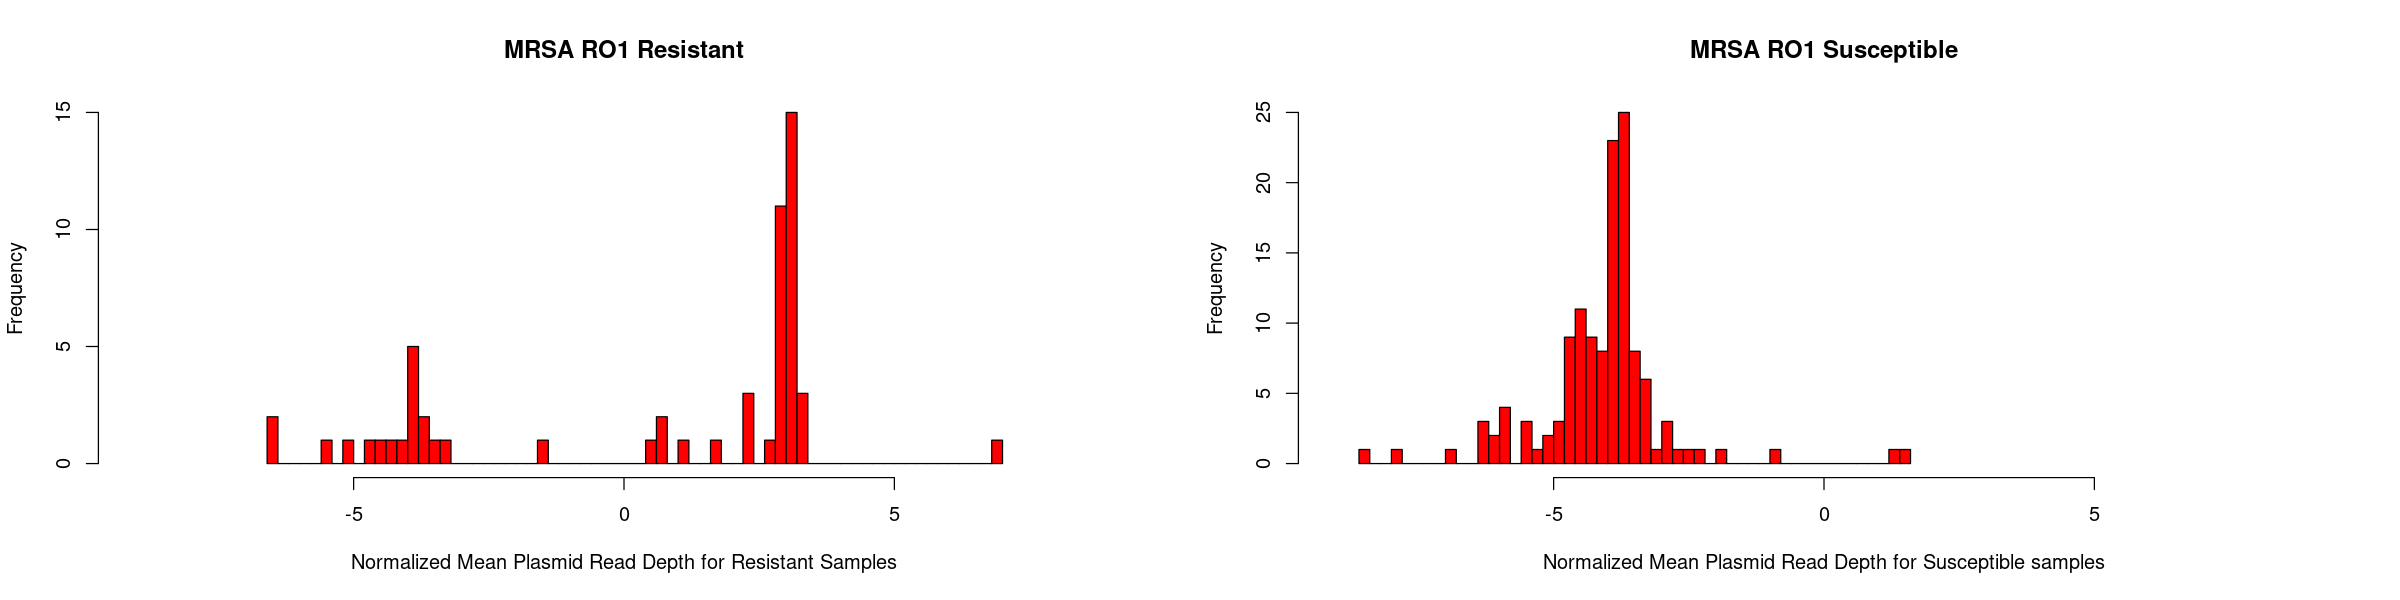

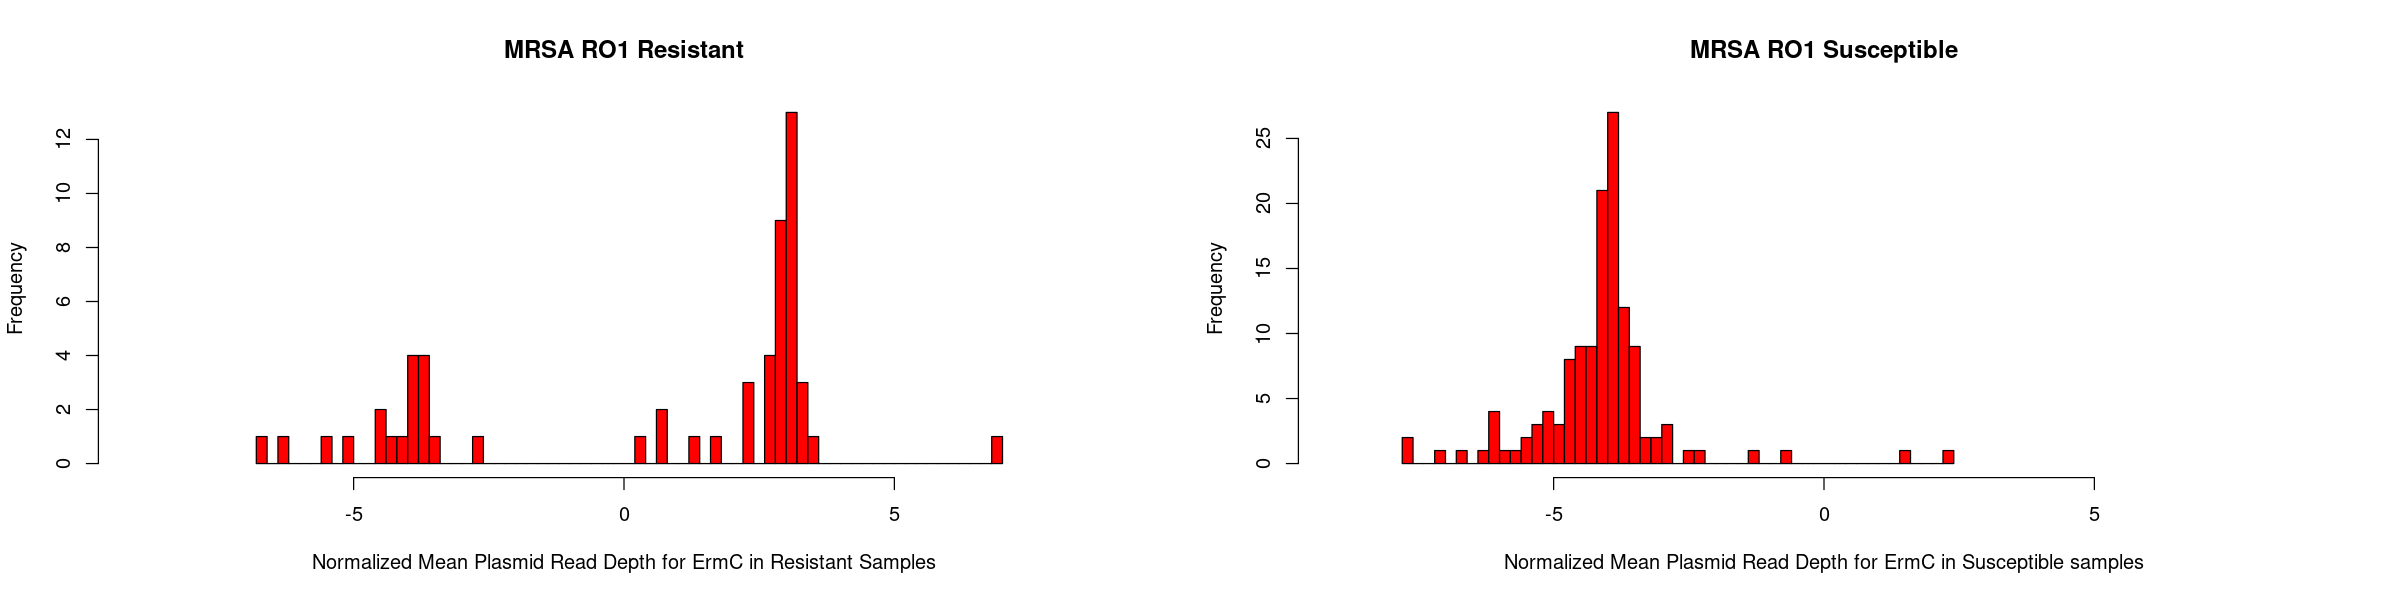

In [5]:
options(repr.plot.width = 20, repr.plot.height = 5)

MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples <- read.csv('Project_MRSA_RO1_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples.csv', row.names = 1)

MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples_log <- log2(MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples$Normalized.Plasmid_mean)

MRSA_RO1_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples <- read.csv('Project_MRSA_RO1_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples.csv', row.names = 1)

MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples_log <- log2(MRSA_RO1_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples$Normalized.Plasmid_mean)

#pdf(file = "MRSA_R01_Normalized_Plasmid_Mean_Resistant_vs_Susceptible_Histogram.pdf", width = 12, height = 12) 

par(mfrow=c(1,2))
RO1_Normalized_plasmid_mean_resistance <- hist(MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples_log, col="red", breaks=50, xlab="Normalized Mean Plasmid Read Depth for Resistant Samples", main="MRSA RO1 Resistant", xlim = c(-9,9))
RO1_Normalized_plasmid_mean_susceptible <- hist(MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples_log, col="red", breaks=50, xlab="Normalized Mean Plasmid Read Depth for Susceptible samples", main="MRSA RO1 Susceptible", xlim = c(-9,9))

#dev.off()

Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples <- read.csv('Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples.csv', row.names = 1)

Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples_log <- log2(Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples)

Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth_susceptible_samples <- read.csv('Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth_susceptible_samples.csv', row.names = 1)


Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth_susceptible_samples_log <- log2(Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth_susceptible_samples)

#pdf(file = "MRSA_R01_Normalized_Plasmid_Mean_Resistant_vs_Susceptible_ErmC_Histogram.pdf", width = 12, height = 12) 
par(mfrow=c(1,2))
RO1_Normalized_plasmid_mean_resistance <- hist(Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples_log$Erm.C, col="red", breaks=50, xlab="Normalized Mean Plasmid Read Depth for ErmC in Resistant Samples", main="MRSA RO1 Resistant", xlim = c(-9,9))
RO1_Normalized_plasmid_mean_susceptible <- hist(Project_MRSA_RO1_USA300_SUR4_Normalized_Mean_Gene_Depth_susceptible_samples_log$Erm.C, col="red", breaks=50, xlab="Normalized Mean Plasmid Read Depth for ErmC in Susceptible samples", main="MRSA RO1 Susceptible", xlim = c(-9,9))

#dev.off()


### Overlay Antibiotic Resistance data on CO-HA Plasmid Depth  

In [47]:
MRSA_COHA_USA300_depth_of_coverage_metadata = pd.read_csv("Project_BAA_MRSA_CO_HA_depth_of_coverage_metadata.csv", sep=',', header=0, dtype = str)

MRSA_COHA_USA300_sample_lookup = pd.read_csv("MRSA_BAA_CO_HA_sample_lookup.csv", sep=',', header=0, dtype = str)

MRSA_COHA_Clinda_resistance = pd.read_csv("cdc_baa_clinda_R.csv", sep=',', header=0, dtype = str)
MRSA_COHA_Clinda_resistance = MRSA_COHA_Clinda_resistance.drop_duplicates()
MRSA_COHA_USA300_sample_lookup.rename(columns = {'Genome ID':'sample_id'}, inplace = True)

MRSA_COHA_Clinda_resistance.rename(columns = {'Cd':'Clinda.Resistance'}, inplace = True)
MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup = pd.merge(MRSA_COHA_USA300_depth_of_coverage_metadata, MRSA_COHA_USA300_sample_lookup, on=["sample_id", "sample_id"], how='left')

In [48]:
MRSA_COHA_Clinda_resistance.head()

,Freezer_#,Clinda.Resistance
0,7303,S
2,7304,S
3,7305,S
4,7308,S
5,7309,R


In [49]:
MRSA_COHA_Clinda_resistance.rename(columns = {'Freezer_#':'Sample ID'}, inplace = True)

MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance = pd.merge(MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup, MRSA_COHA_Clinda_resistance, on=["Sample ID", "Sample ID"], how="left")

Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth = pd.read_csv("Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth.csv", sep=',', header=0, dtype = str)

#MRSA_RO1_USA300_depth_of_coverage_metadata_with_lookup_and_resistance.to_csv('Project_MRSA_RO1_depth_of_coverage_metadata_with_lookup_and_resistance.csv', index=False)

In [50]:
MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance = MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance.fillna("NA")

MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples = MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance.loc[MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance['Clinda.Resistance'] == "R"]

MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples = MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance.loc[MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance['Clinda.Resistance'] == "S"]

In [51]:
len(MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples)

283

In [52]:
len(MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples)

849

In [53]:
MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples.to_csv('MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples.csv', index=False)
MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples.to_csv('MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples.csv', index=False)

In [54]:
MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance.to_csv('MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance.csv', index=False)

Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth = pd.read_csv("Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth.csv", sep=',', header=0, dtype = str)

Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth['sample_id'] = Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth['sample_id'].str.replace(r'_$', '')

Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples = Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth[Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth['sample_id'].isin(MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples['sample_id'])]

Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth_susceptible_samples = Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth[Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth['sample_id'].isin(MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples['sample_id'])]

/tmp/ipykernel_374294/1600779906.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth['sample_id'] = Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth['sample_id'].str.replace(r'_$', '')


In [55]:
Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples.to_csv('Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples.csv', index=False)
Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth_susceptible_samples.to_csv('Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth_susceptible_samples.csv', index=False)

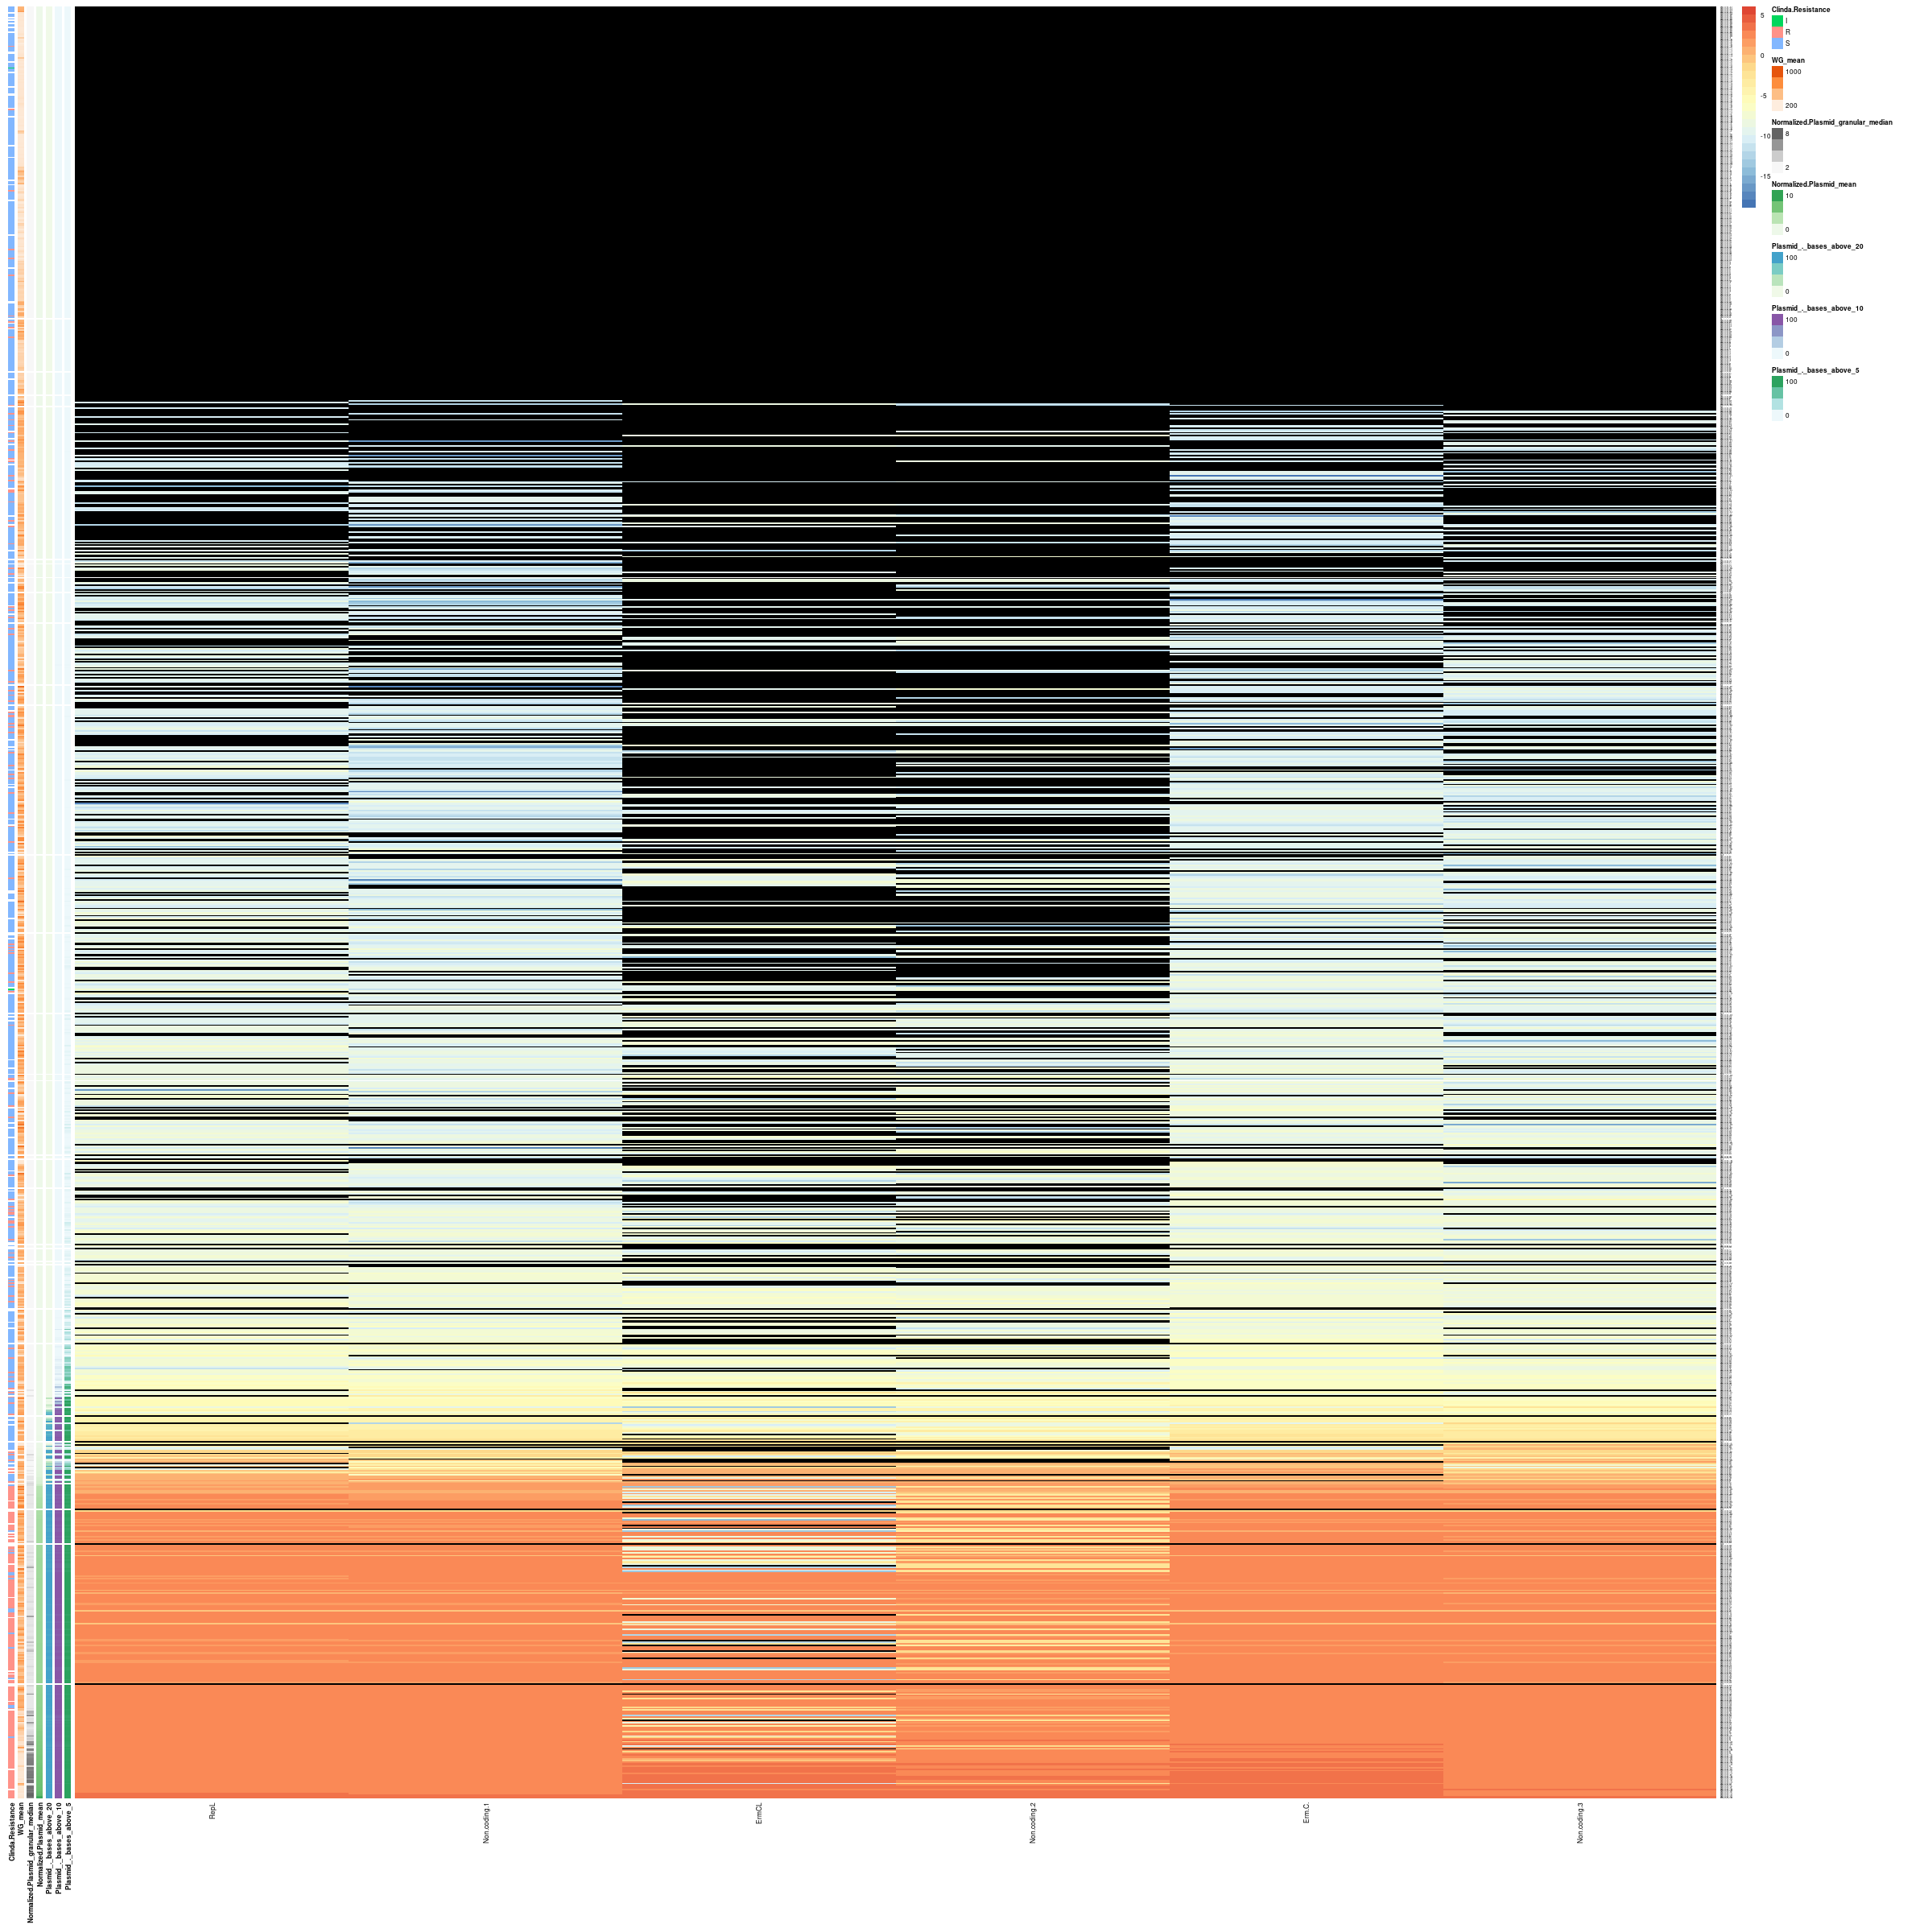

In [62]:

# Read in DepthofCoverage Metadata and Gene Read Depth
MRSA_COHA_DepthofCoverage_metadata_with_resistance <- read.csv('MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance.csv', row.names = 1)


MRSA_COHA_Norm_Mean_Gene_DepthofCoverage <- read.csv('Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth.csv', row.names = 1)

rownames(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage) <- gsub('_$', '', rownames(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage))

#Assign rownames to the Gene Read Depth dataframes
MRSA_COHA_Norm_Mean_Gene_DepthofCoverage$Samples <- rownames(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage)

# Drop NEG CONTRL Samples from the dataframe
MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL <- MRSA_COHA_Norm_Mean_Gene_DepthofCoverage

# Drop Outlier Sample MRSA_CM_1385 from the dataframe
MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier <- MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL

# Drop usused column Samples
MRSA_COHA_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column <- subset(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier, select = -c(Samples) )
MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column <- subset(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier, select = -c(Samples) )


#colnames(MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier) <- c("RepL", "Non-coding 1", "ErmCL", "Non-coding 2", "Erm(C)", "Non-coding 3")


#annotation_row <- MRSA_RO1_DepthofCoverage_metadata[ , c("Plasmid_._bases_above_20", "Normalized.Plasmid_mean", "Normalized.Plasmid_granular_median", "WG_mean")]

# Extract Annotation rows from Depth of Coverage Metadata
annotation_row <- MRSA_COHA_DepthofCoverage_metadata_with_resistance[ , c("Plasmid_._bases_above_5", "Plasmid_._bases_above_10", "Plasmid_._bases_above_20", "Normalized.Plasmid_mean", "Normalized.Plasmid_granular_median", "WG_mean", "Clinda.Resistance")]

# Assign rownames
annotation_row$Samples <- rownames(annotation_row)

# Drop NEG CTRL samples
annotation_row_exclude_NEG_CTRL <- annotation_row

# Drop outlier sample MRSA_CM_1385
annotation_row_exclude_NEG_CTRL_drop_outlier <- annotation_row_exclude_NEG_CTRL

# Sort row Annotations by Normalized.Plasmid_mean
annotation_row_exclude_NEG_CTRL_drop_outlier_sorted <- annotation_row_exclude_NEG_CTRL_drop_outlier[order(annotation_row_exclude_NEG_CTRL_drop_outlier$Normalized.Plasmid_mean),]

# Drop the unused Samples column
annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column_sorted <- subset(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted, select = -c(Samples) )

#colnames(annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column) <- c("%Basesabove20", "Norm.PlasmidMean", "Norm.PlasmidMedian", "WG_mean")

# Rename column names
colnames(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted) <- c("%Basesabove5", "%Basesabove10", "%Basesabove20", "Norm.PlasmidMean", "Norm.PlasmidMedian", "WG_mean", "Clinda.Resistance")

#pheatmap(MRSA_RO1_Gene_DepthofCoverage, annotation_row = annotation_row, cluster_cols =  FALSE, angle_col = 45, fontsize_row=1, border_color=NA, fontsize = 5)

#MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_RO1_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[order(row.names(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted)), ]

#MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_RO1_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[order(row.names(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted)), ]

MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column[match(rownames(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted), rownames(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column)), ]
#MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered <- MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered[match(rownames(annotation_row_exclude_NEG_CTRL_drop_outlier_sorted), rownames(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column)), ]


MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log <- log2(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered)

is.na(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log) <- sapply(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log, is.infinite)


#pdf(file = "MRSA_COHA_Normalized_mean_Gene_DepthofCoverage_log.pdf", width = 12, height = 12) 

breaksList = seq(-19, 6, by = 1)
    
pheatmap(MRSA_COHA_Norm_Mean_Gene_DepthofCoverage_exclude_NEG_CTRL_drop_outlier_drop_column_ordered_log, annotation_row = annotation_row_exclude_NEG_CTRL_drop_outlier_drop_column_sorted, cluster_cols =  FALSE, cluster_rows =  FALSE, angle_col = 90, fontsize_row=1, border_color=NA, fontsize = 5, na_col = "black",  breaks = breaksList, color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)))

#dev.off()



In [82]:
options(repr.plot.width = 20, repr.plot.height = 5)

MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples <- read.csv('MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples.csv', row.names = 1)

MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples_log <- log2(MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples$Normalized.Plasmid_mean)

MRSA_COHA_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples <- read.csv('MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples.csv', row.names = 1)

MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples_log <- log2(MRSA_COHA_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples$Normalized.Plasmid_mean)

pdf(file = "MRSA_COHA_Normalized_Plasmid_Mean_Resistant_vs_Susceptible_Histogram.pdf", width = 12, height = 12) 

par(mfrow=c(1,2))
COHA_Normalized_plasmid_mean_resistance <- hist(MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_resistant_samples_log, col="red", breaks=50, xlab="Normalized Mean Plasmid Read Depth for Resistant Samples", main="MRSA COHA Resistant", xlim = c(-15,5))
COHA_Normalized_plasmid_mean_susceptible <- hist(MRSA_COHA_USA300_depth_of_coverage_metadata_with_lookup_and_resistance_susceptible_samples_log, col="red", breaks=50, xlab="Normalized Mean Plasmid Read Depth for Susceptible samples", main="MRSA COHA Susceptible", xlim = c(-15,5))

dev.off()



png 
  2

In [84]:
Project_MRSA_COHA_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples <- read.csv('Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples.csv', row.names = 1)

# Project_MRSA_COHA_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples <- Project_MRSA_COHA_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples[, !(colnames(Project_MRSA_COHA_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples) %in% c("Clinda.Resistance"))]

Project_MRSA_COHA_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples_log <- log2(Project_MRSA_COHA_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples$Erm.C)

Project_MRSA_COHA_USA300_SUR4_Normalized_Mean_Gene_Depth_susceptible_samples <- read.csv('Project_BAA_MRSA_CO_HA_USA300_SUR4_Normalized_Mean_Gene_Depth_susceptible_samples.csv', row.names = 1)


Project_MRSA_COHA_USA300_SUR4_Normalized_Mean_Gene_Depth_susceptible_samples_log <- log2(Project_MRSA_COHA_USA300_SUR4_Normalized_Mean_Gene_Depth_susceptible_samples$Erm.C)

pdf(file = "MRSA_COHA_Normalized_Plasmid_Mean_Resistant_vs_Susceptible_ErmC_Histogram.pdf", width = 12, height = 12) 
par(mfrow=c(1,2))
COHA_Normalized_plasmid_mean_resistance <- hist(Project_MRSA_COHA_USA300_SUR4_Normalized_Mean_Gene_Depth_Resistant_samples_log, col="red", breaks=50, xlab="Normalized Mean Plasmid Read Depth for ErmC in Resistant Samples", main="MRSA COHA Resistant", xlim = c(-15,5))
COHA_Normalized_plasmid_mean_susceptible <- hist(Project_MRSA_COHA_USA300_SUR4_Normalized_Mean_Gene_Depth_susceptible_samples_log, col="red", breaks=50, xlab="Normalized Mean Plasmid Read Depth for ErmC in Susceptible samples", main="MRSA COHA Susceptible", xlim = c(-15,5))
dev.off()

png 
  2